### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
#Read in data
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv.zip')

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

22 variables, 21 independent and diabetes_012 as target variable. 253680 observations.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

**Takeaways**:

- No null values
- 253680 observations total
- 21 independent variables
- Diabetes_binary is target variable
- All are saved as float64, may want to convert to int for binary values?
-

# Data Dictionary

**HighBP** : 0 = no high BP 1 = high BP

**HighCol**: 0 = no high cholesterol 1 = high cholesterol

**CholCheck**: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

**BMI** : Body Mass Index

**Smoker**: Have you smoked at least 100 cigarettes in your entire life? 0 = no 1 = yes

**Stroke**: (Ever told) you had a stroke. 0 = no 1 = yes

**HeartDiseaseorAttack**: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

**PhysActivity**: physical activity in past 30 days - not including job 0 = no 1 = yes

**Fruits**: Consume Fruit 1 or more times per day 0 = no 1 = yes

**Veggies**: Consume Vegetables 1 or more times per day 0 = no 1 = yes

**HvyAlcoholConsumpution**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

**AnyHealthCare** : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

**NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

**GenHlth**: Would you say that in general your health is:
   
*Scale: 1-5, 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor*

**MenHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

*Scale: 1-30 days*

**PhysHlth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

*Scale 1-30 days*

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

**Sex**: 0 = female 1 = male

**Age**: 13-level age category (_AGEG5YR see codebook)

*1 = 18-24 9 = 60-64 13 = 80 or older*

**Education level** (EDUCA see codebook):

*scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)*

**Income scale** (INCOME2 see codebook):

*scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more*

https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf

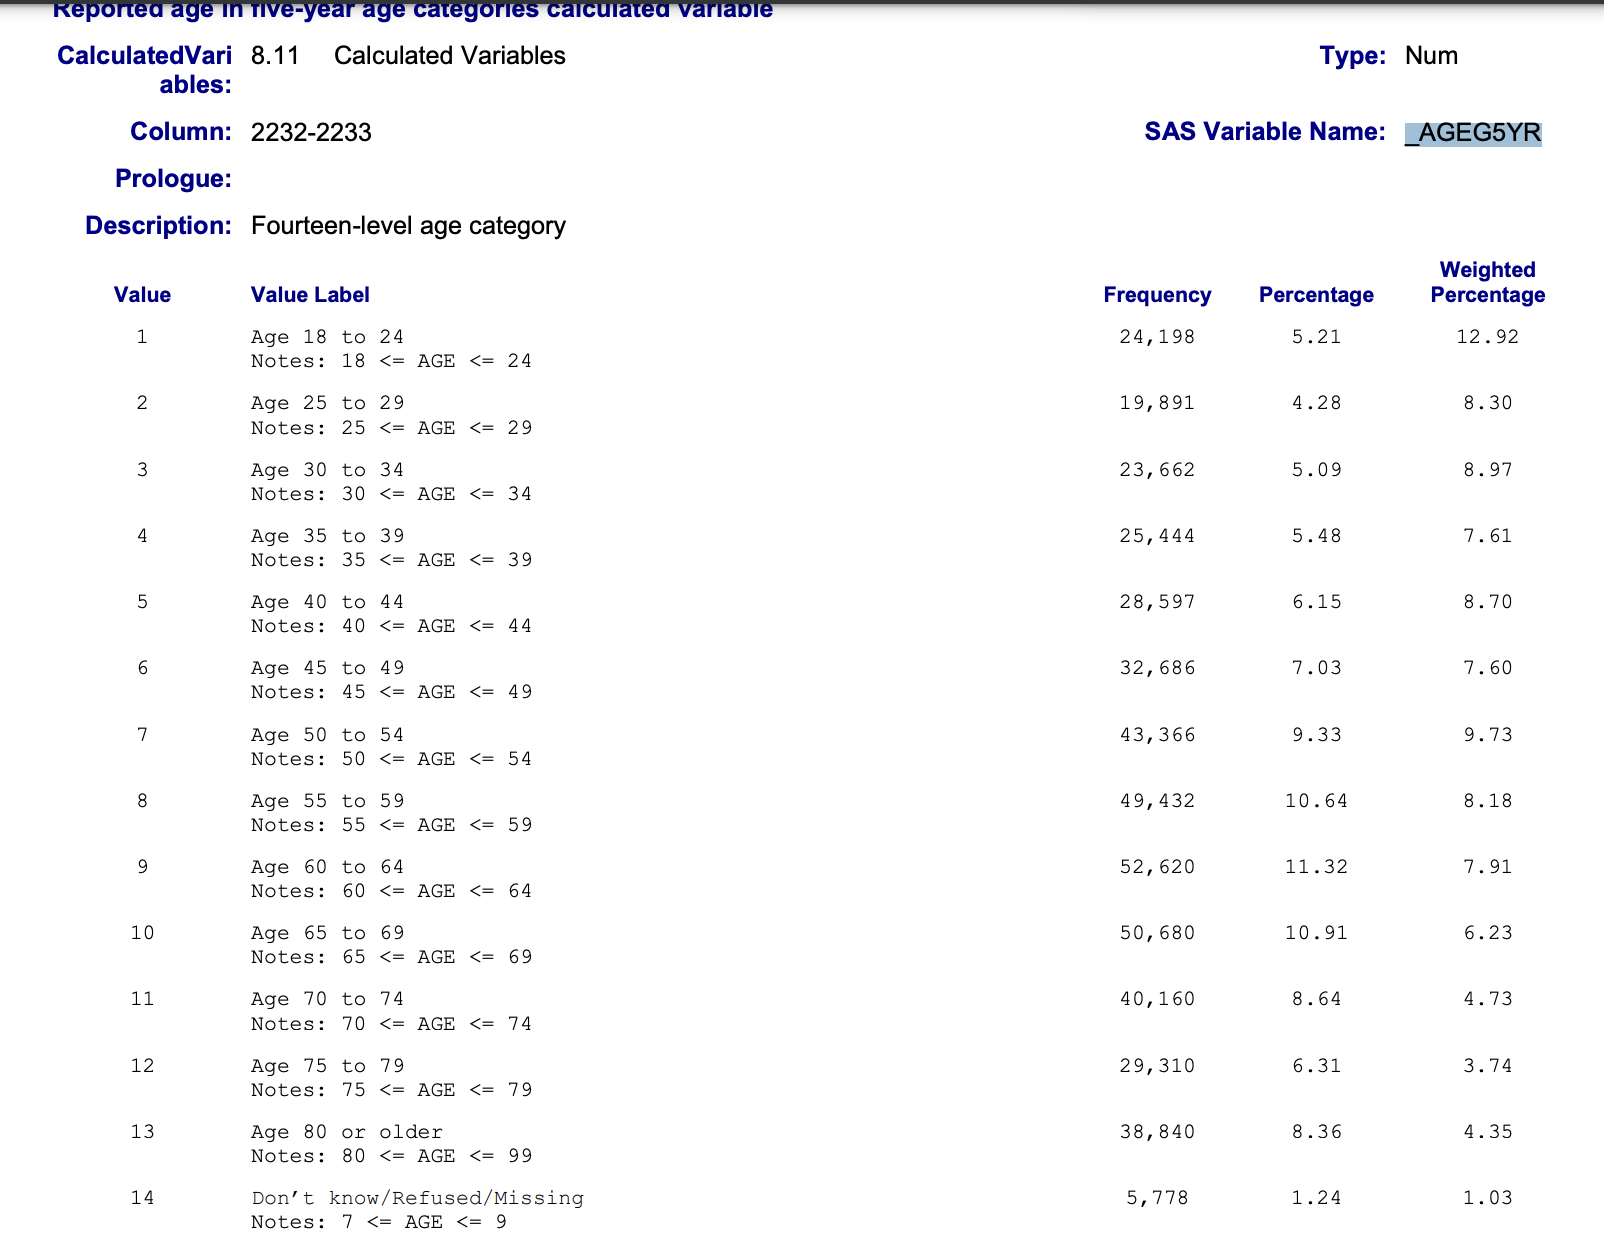

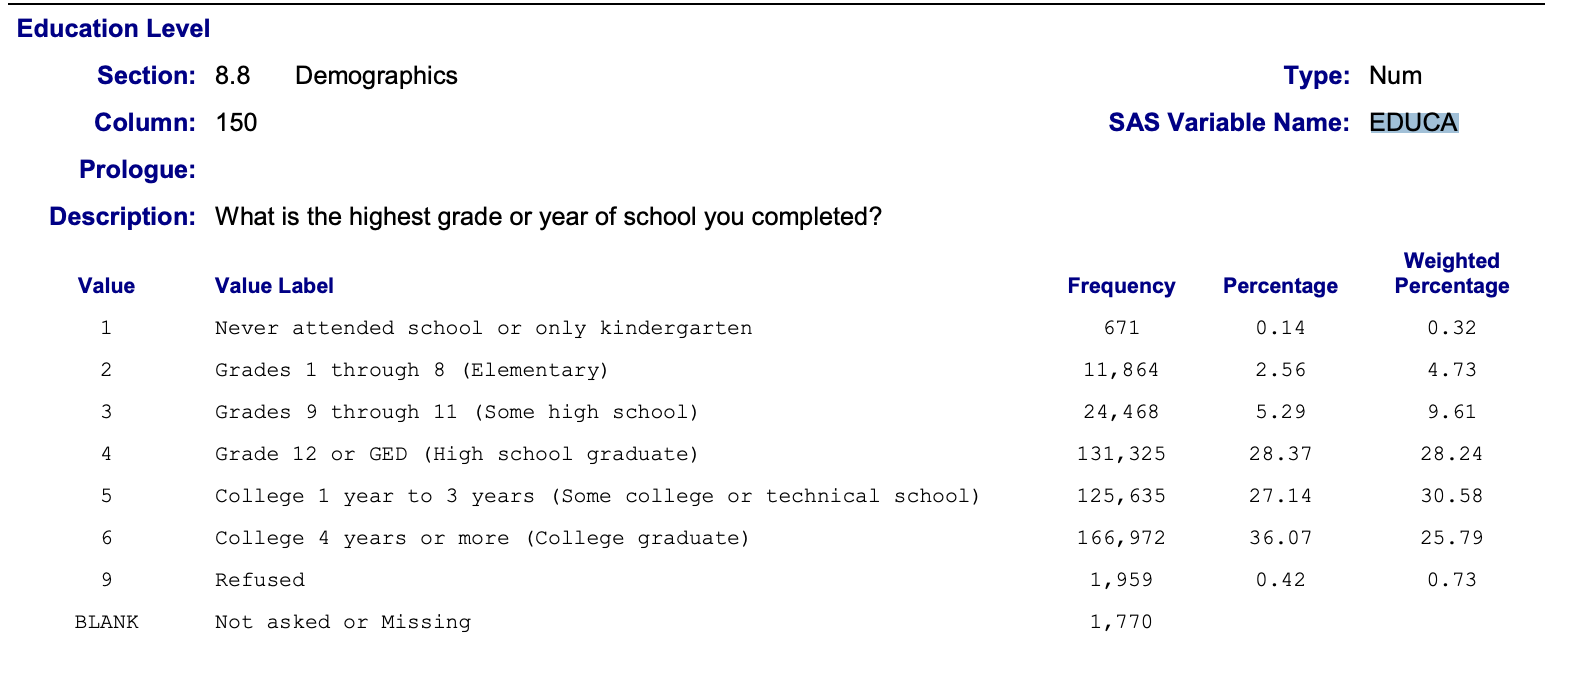

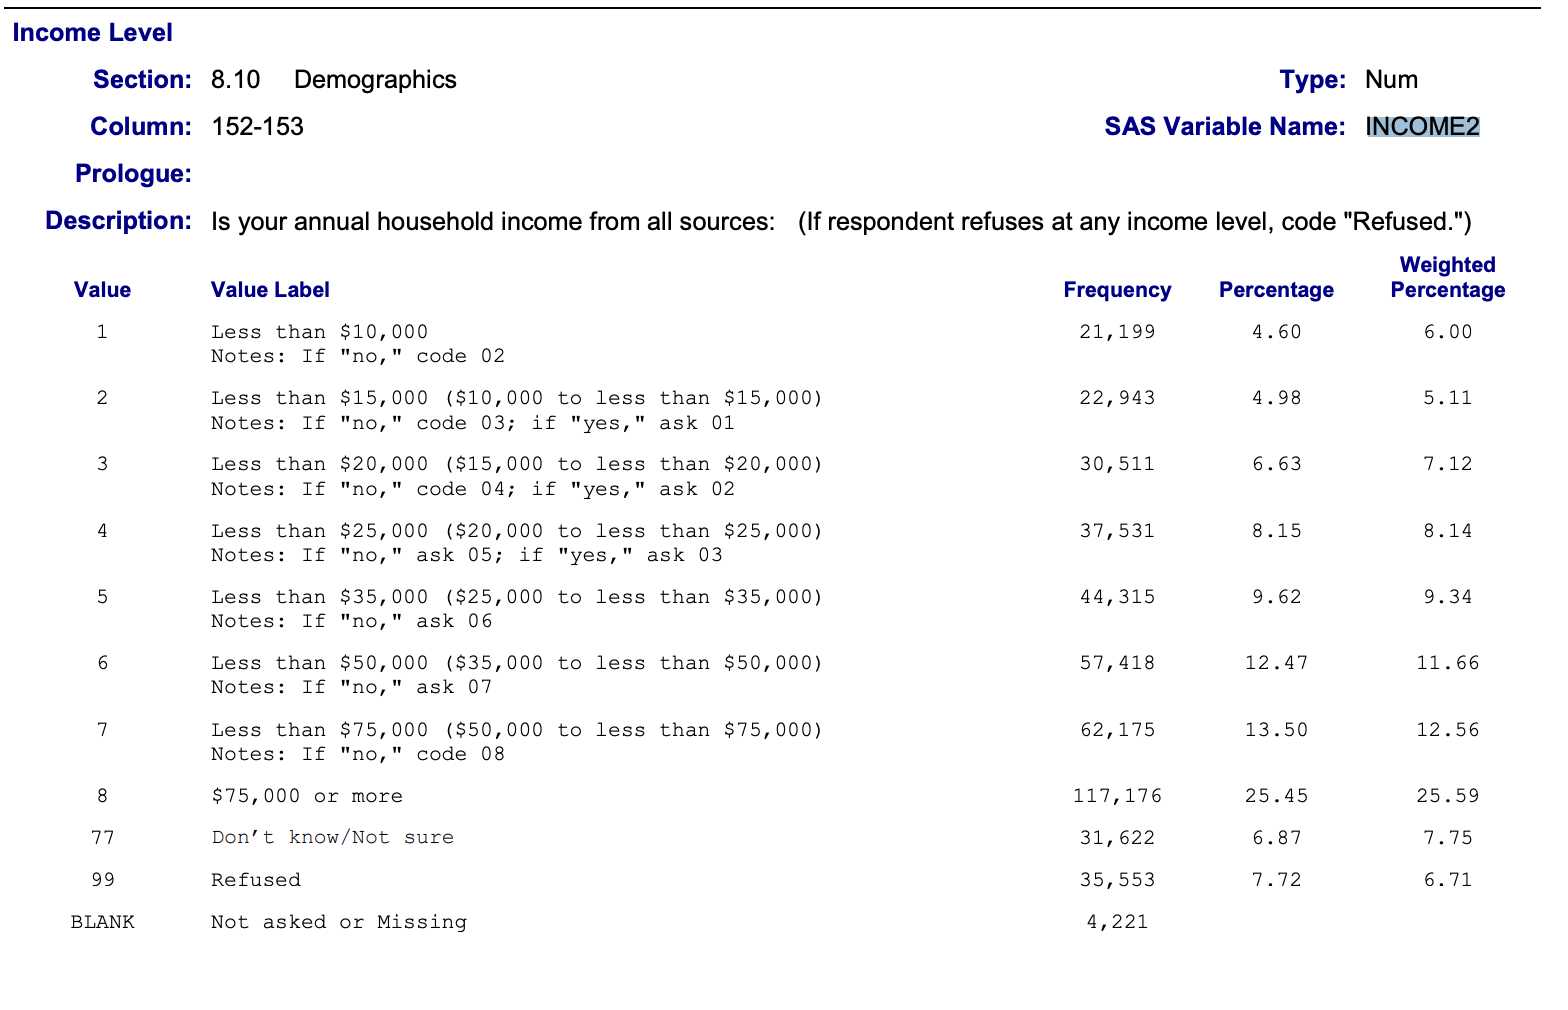

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# EDA Tools

## Sweetviz


In [ ]:
#!pip install --upgrade markupsafe==2.0.1
#!pip install --upgrade jinja2

In [ ]:
#my_report = sv.analyze(df)
#my_report.show_html("comparison_report.html")

# EDA

## Overall

### Histograms

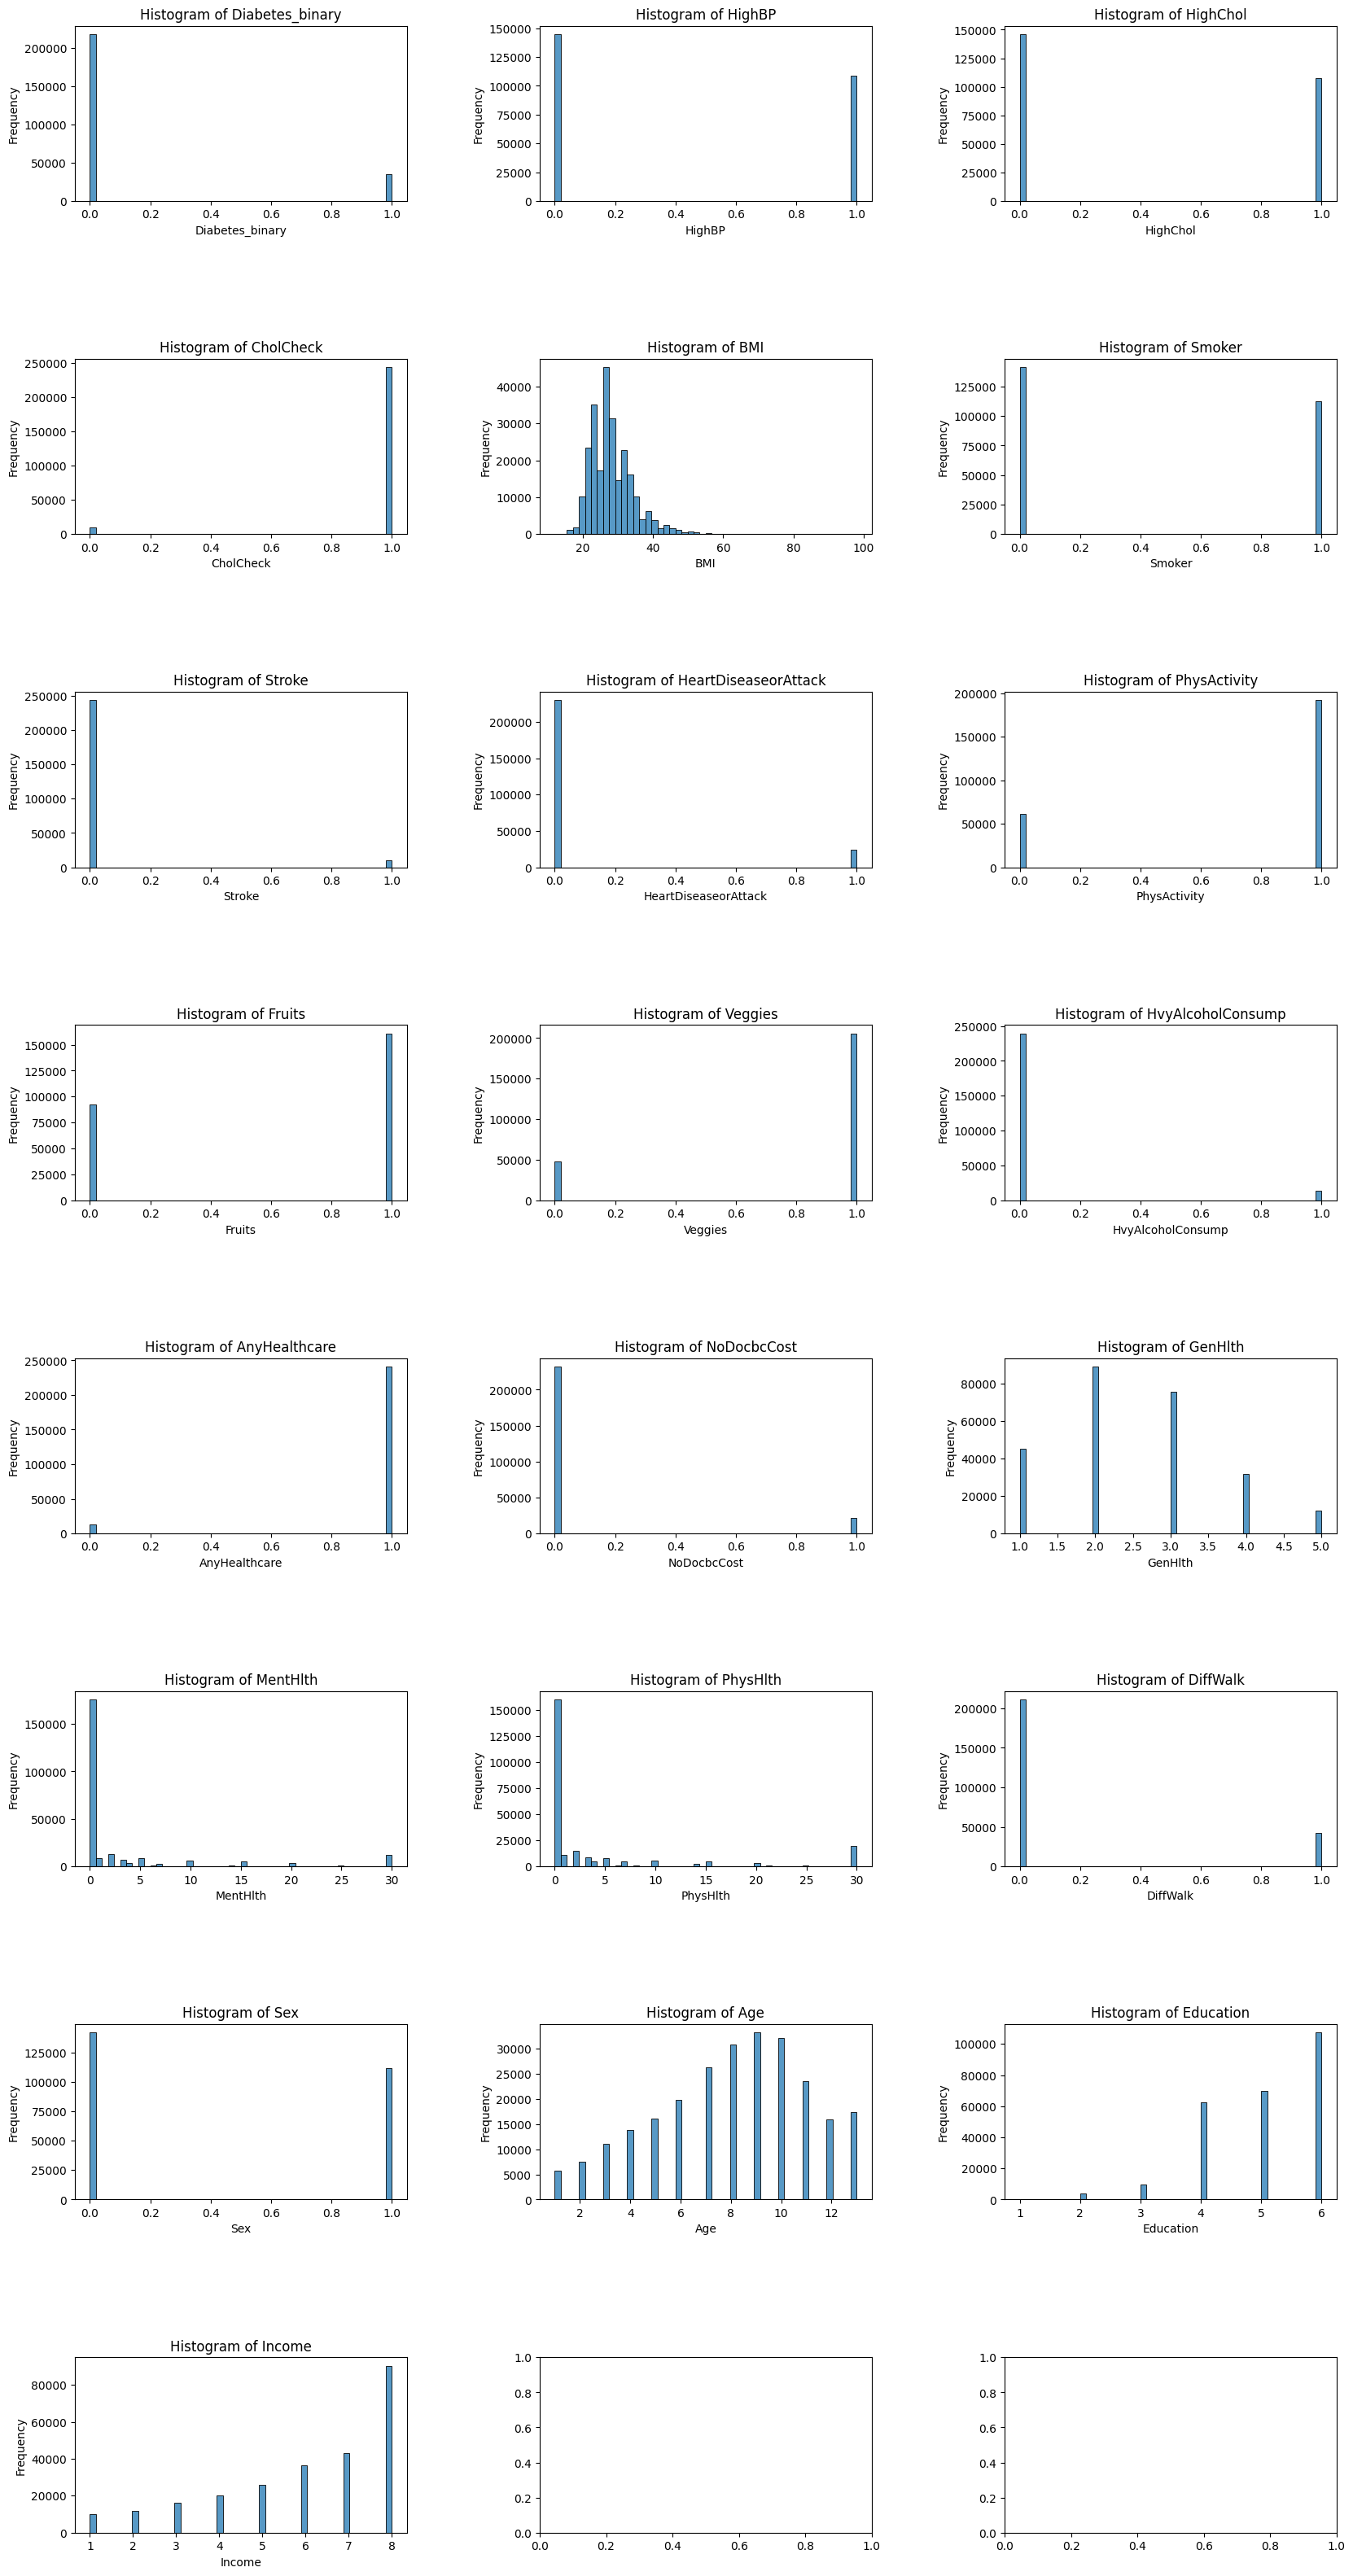

In [ ]:
fig, axes = plt.subplots(8, 3, figsize=(20, 40)) # Adjust figsize as needed
axes = axes.flatten()


for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=50, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.subplots_adjust(wspace=0.4, hspace=0.9)  # Adjust wspace and hspace as needed
plt.show()


**Takeaways**:
- BMI is slightly skewed
- Education and Income is skewed (Should these be transformed?)
- Don't need to transform for the non linear ml models

- Not many prediabetic cases so could combine
- Not many cases of heart disease or attack or stroke
- Most peoples physical health was good, same with mental health
- More male than female participants
- Age range is normal dist
- Majority of people fall in the high education/high income cat of this survey

- Class imbalance with diabetes, should consider SMOTE for training.

### Boxplots

Need for these mostly cat variables?

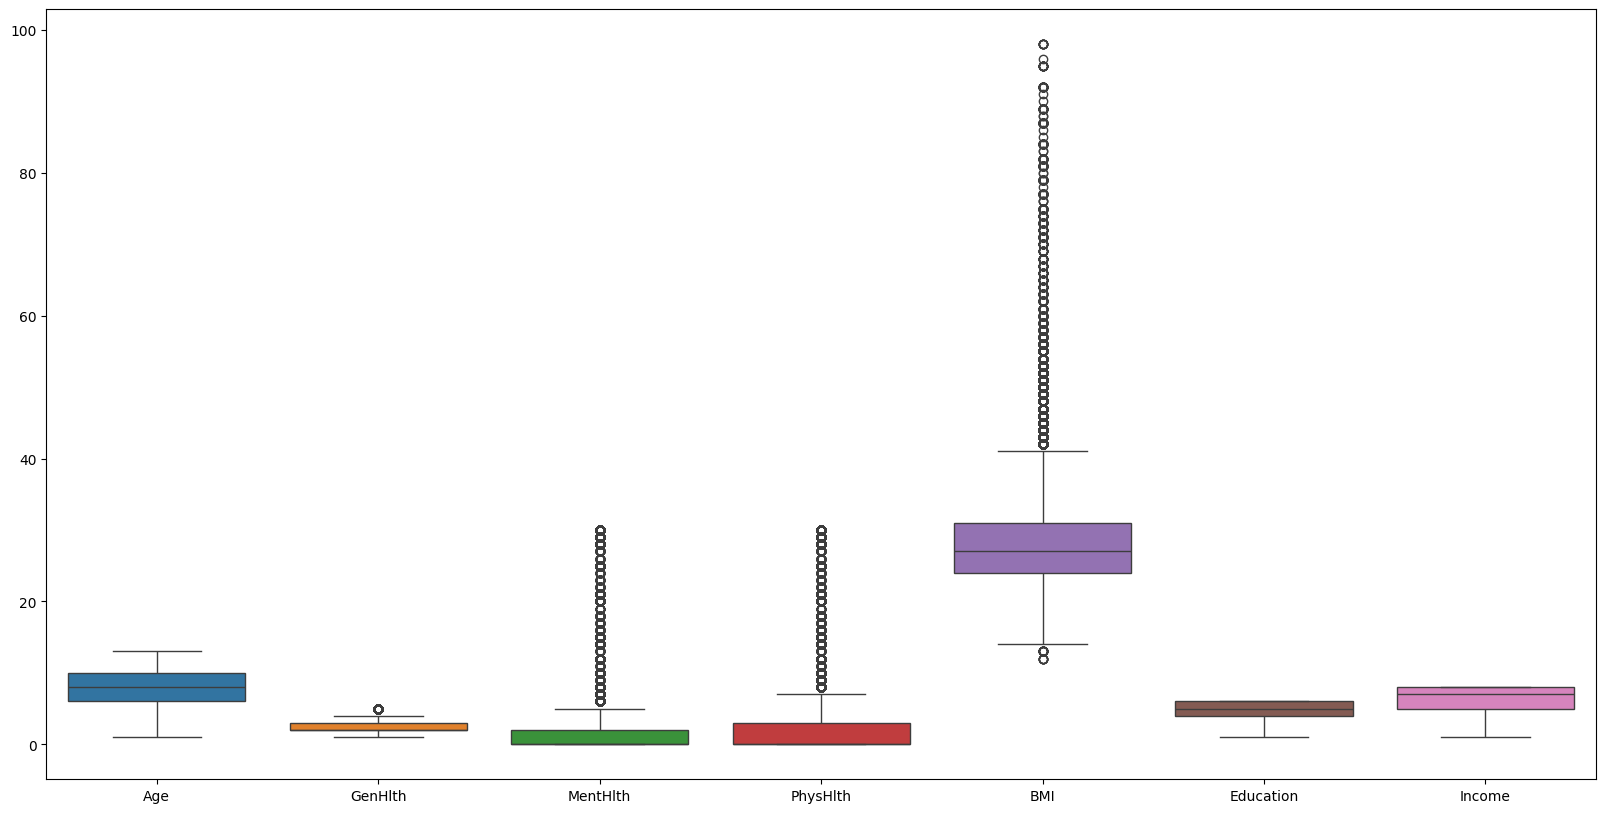

In [ ]:
#Create boxplots to try to identify outliers (Can only do with the integer values - BMI, GenHlth, MentHlth, PhysHlth, Age, Educ, Income)

#Subset df for the integer col

int_df = df[['Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Education', 'Income']]

#Create boxplots using seaborn package
plt.figure(figsize=(20,10))
sns.boxplot(data=int_df)
plt.show()

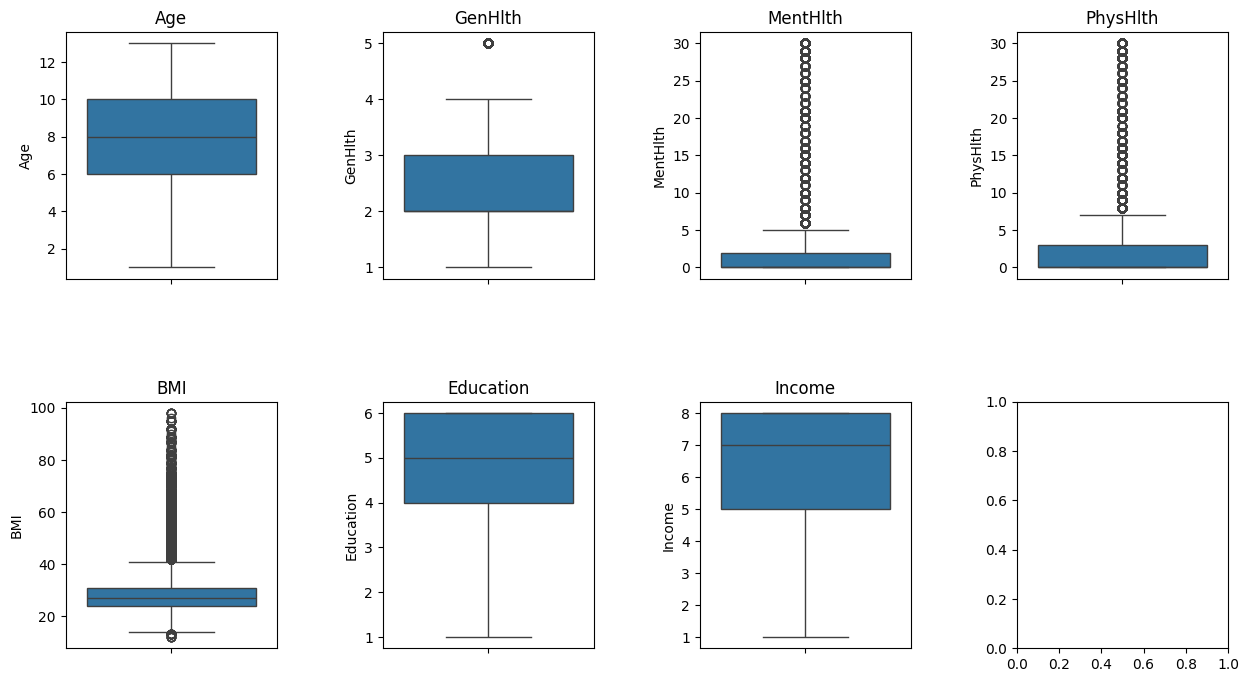

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8)) # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5, wspace=0.5) # Adjust spacing as needed

 # Loop through each column and create a box plot
for i, column in enumerate(int_df.columns):
   ax = axes[i // 4, i % 4]  # Get the correct subplot
   sns.boxplot(y=column, data=int_df, ax=ax)  # Create the box plot with seaborn
   ax.set_title(column)  # Set the title of the subplot

for i in range(len(int_df), 2 * 4):
    fig.delaxes(axes[i // 4, i % 4])

 # Show the plot
plt.show()

Takeaways:
- BMI, MentHlth, PhysHlth have plenty outliers

Meaning, majority of people in the suverys mental and physical health is good, it is rare that someone would report bad general health - case 5.

### Correlation Matrix

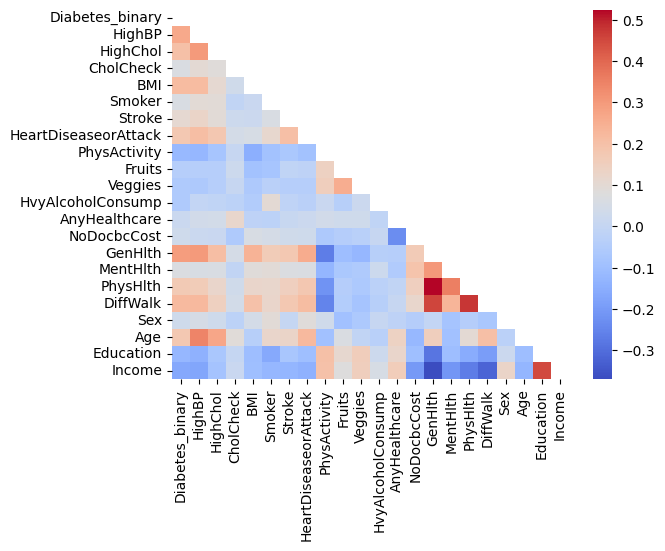

In [ ]:
#Generate Correlation Matrix heatmap
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

upper_triangular_corr = corr.mask(mask)

sns.heatmap(upper_triangular_corr, annot=False, cmap='coolwarm')
plt.show()

**Takeaways**:
- General Health, high blood pressure and age seem to be a few of the stronger positively correlated features to diabetes
- Income, education and physical activity are some of the more negatively correlated features in the dataset to diabetes

**Multicollinearity Issues**
- General Health with Physical health and difficulty walking as well as income and education

- Physical healht and difficulty walking are highly correlated

- Education and Income are highly correlated

- NoDocbcCost and AnyHealthcare are also correlated

### Multicolinearity Check

In [ ]:
# print out the largest

# Define your target variable (replace 'target_column' with your actual target variable name)
target_variable = 'Diabetes_binary'

# Remove correlations with the target variable
corr = corr.drop(target_variable, axis=1)

corr_unstacked = corr.unstack().sort_values(ascending=False)

# Remove self-correlation (correlation of a variable with itself is always 1)
corr_unstacked = corr_unstacked[corr_unstacked != 1]

corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) < corr_unstacked.index.get_level_values(1)]

# Filter top correlated pairs (adjust threshold as needed)
top_corr = corr_unstacked.head(10)

# Display the table
top_corr_table = top_corr.reset_index()
print(top_corr_table)

     level_0   level_1         0
0    GenHlth  PhysHlth  0.524364
1   DiffWalk  PhysHlth  0.478417
2   DiffWalk   GenHlth  0.456920
3  Education    Income  0.449106
4   MentHlth  PhysHlth  0.353619
5        Age    HighBP  0.344452
6    GenHlth  MentHlth  0.301674
7    GenHlth    HighBP  0.300530
8     HighBP  HighChol  0.298199
9        Age  HighChol  0.272318


## Target Specific

In [ ]:
#Count each unique values of Diabetes_012
df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,35346


Case 0: No diabetes
Case 1: Prediabetic + Diabetic

"diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced."

Slight imbalance but could use **SMOTE**

In [ ]:
corr_matrix = df.corr()

# Select correlations involving the target variable only
target_corr = corr_matrix[target_variable].sort_values(ascending=False)

# Remove the self-correlation (correlation of the target with itself is always 1)
target_corr = target_corr[target_corr != 1]

print(target_corr)


GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [ ]:
columns_to_plot = [col for col in df.columns if df[col].nunique() < 10]

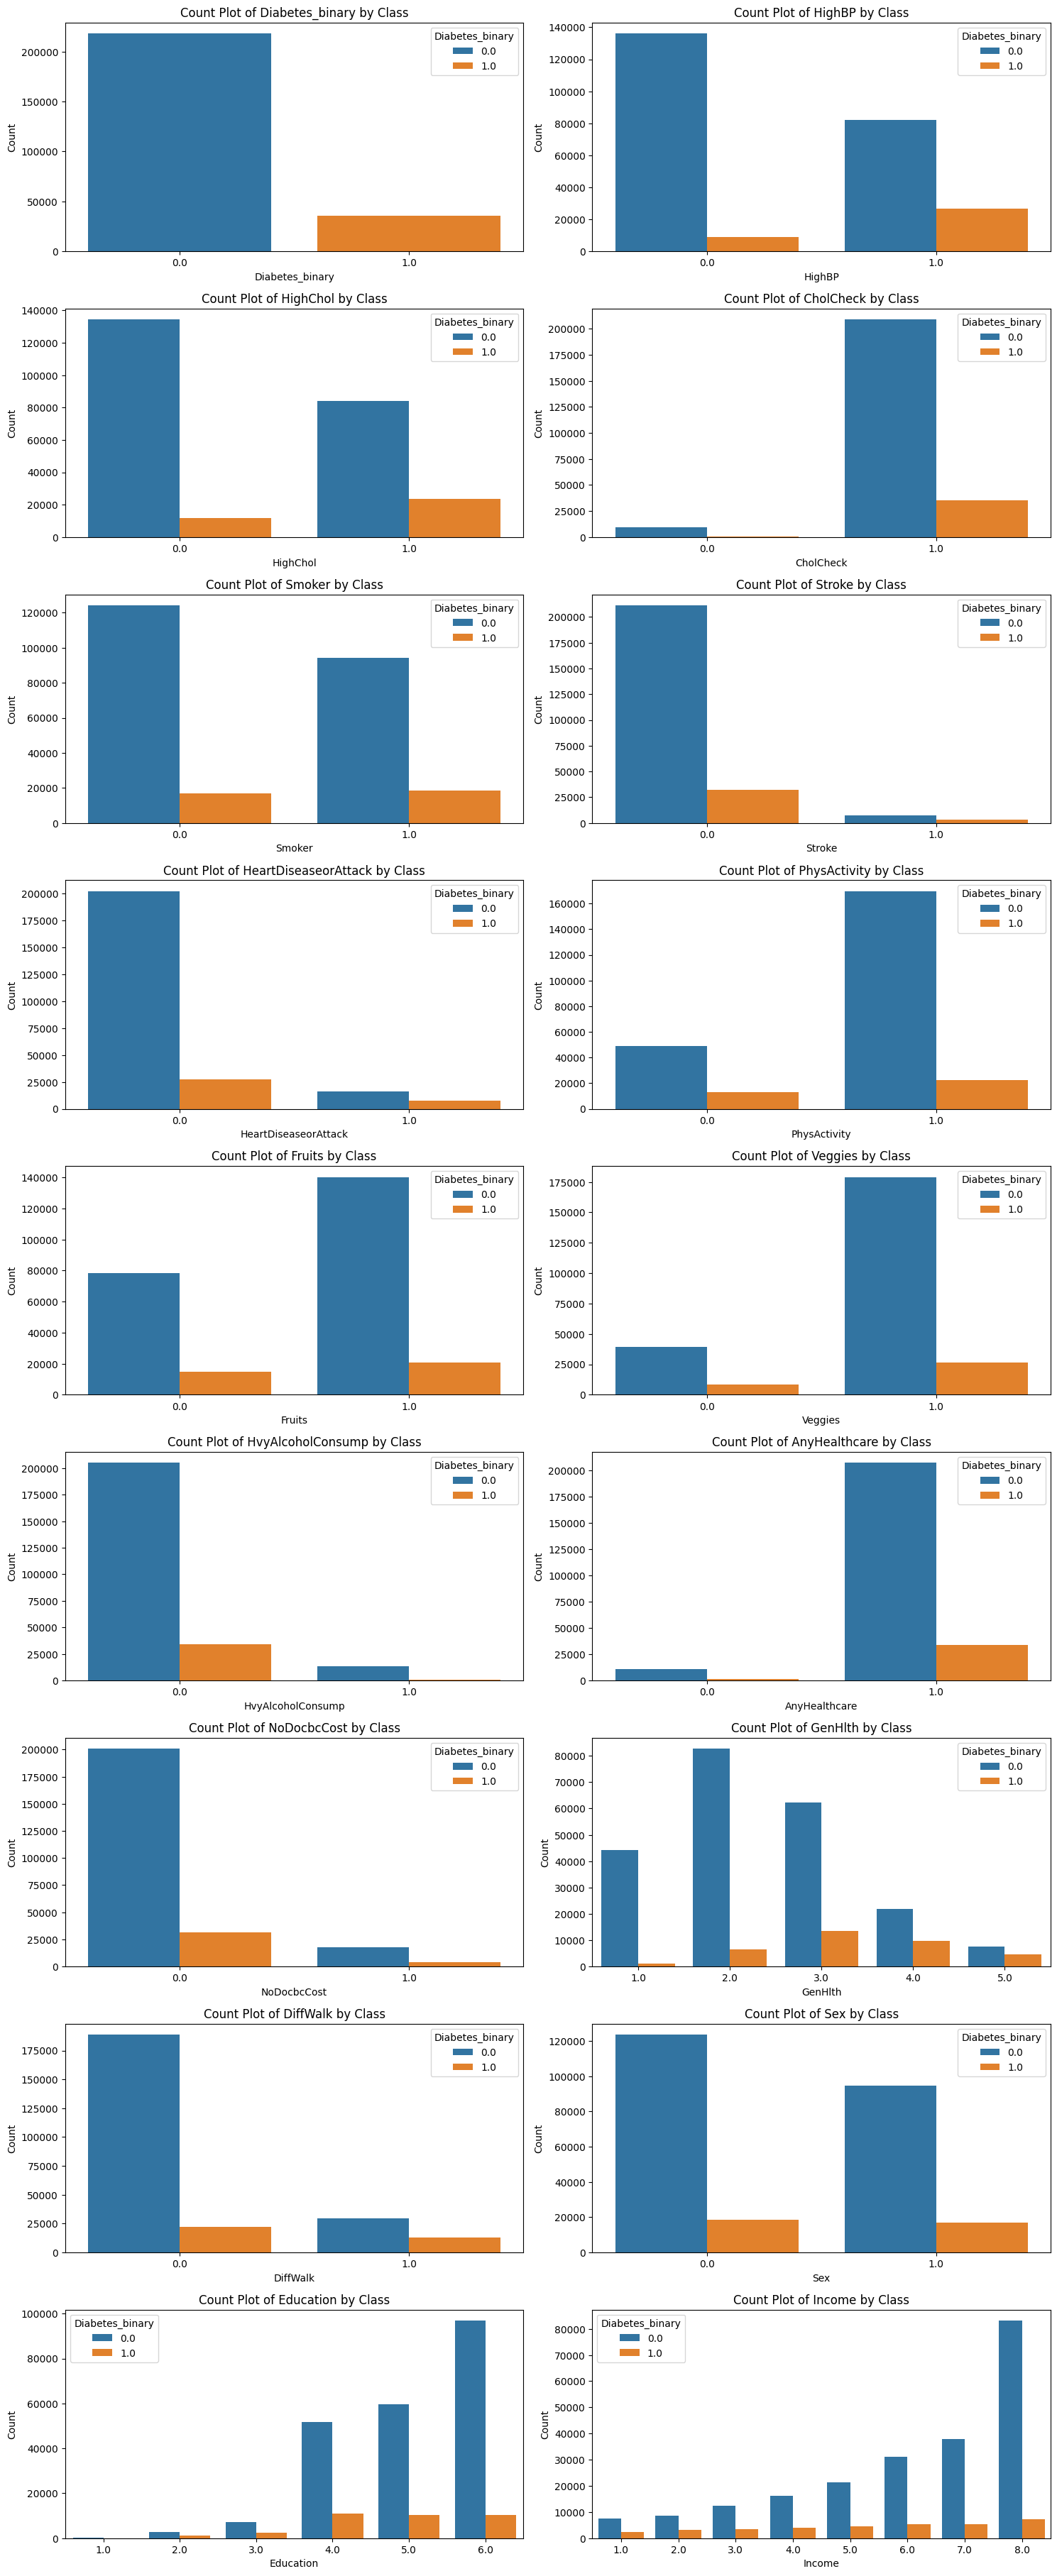

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(10, 2, figsize=(15, 40))
axes = axes.flatten()  # Flatten for easier iteration

# Iterate and plot on the axes
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='Diabetes_binary', data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column} by Class')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any unused subplots to avoid empty spaces
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-21-cbe54d39f09d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes_label', data=df, palette='Blues')


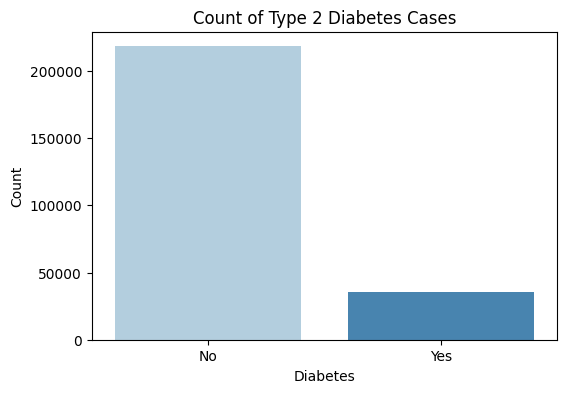

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame named df with a binary 'diabetes' column
df['diabetes_label'] = df['Diabetes_binary'].map({0: 'No', 1: 'Yes'})  # Map 0 -> No, 1 -> Yes

# Create the count plot
plt.figure(figsize=(6,4))
sns.countplot(x='diabetes_label', data=df, palette='Blues')

# Add labels
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Count of Type 2 Diabetes Cases")

plt.show()

In [ ]:
df.drop(columns=['diabetes_label'], inplace=True)

# Data Cleaning

In [ ]:
# Add interaction terms/variables to data
df['Age_HighBP'] = df.Age * df.HighBP
df['Age_Sex'] = df.Age * df.Sex
df['MentHlth_HighBP'] = df.MentHlth * df.HighBP
df['Sex_HighBP'] = df.Sex * df.HighBP
df['HighBP_BMI'] = df.HighBP * df.BMI
df['Education_HvyAlcohol'] = df.Education * df.HvyAlcoholConsump

In [ ]:
#Ordinal Encode
from sklearn.preprocessing import OrdinalEncoder

age_ordinal_encoder = OrdinalEncoder(categories=[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']])
df['Age'] = age_ordinal_encoder.fit_transform(df[['Age']])

# Adjust values to be in the range of 1-13 instead of 0-12
df['Age'] = df['Age'] + 1

educ_ordinal_encoder = OrdinalEncoder(categories = [['1','2','3','4','5','6']])
df['Education'] = educ_ordinal_encoder.fit_transform(df[['Education']])

# Adjust values to be in the range of 1-13 instead of 0-12
df['Education'] = df['Education'] + 1

income_ordinal_encoder = OrdinalEncoder(categories = [['1','2','3','4','5','6','7','8']])
df['Income'] = income_ordinal_encoder.fit_transform(df[['Income']])

df['Income'] = df['Income'] + 1



In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Sex,Age,Education,Income,Age_HighBP,Age_Sex,MentHlth_HighBP,Sex_HighBP,HighBP_BMI,Education_HvyAlcohol
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.440342,8.032119,5.050434,6.053875,3.966474,3.495427,1.573400,0.201734,12.875205,0.289266
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.496429,3.054220,0.985774,2.071148,4.870205,4.435161,5.602734,0.401296,15.524227,1.205291
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,10.000000,6.000000,8.000000,9.000000,8.000000,0.000000,0.000000,28.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,6.000000,8.000000,13.000000,13.000000,30.000000,1.000000,98.000000,6.000000


In [ ]:
# Change Categorical to Factor
binary_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                  'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                  'NoDocbcCost', 'DiffWalk', 'Sex','Diabetes_binary']
df[binary_columns] = df[binary_columns].astype('int')

# Convert ordinal/scale columns to int
ordinal_columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'Age_HighBP', 'Age_Sex','Sex_HighBP','Education_HvyAlcohol']
df[ordinal_columns] = df[ordinal_columns].astype('int')

# BMI can be a float
df['BMI'] = df['BMI'].astype('float')

In [ ]:
df.info()

#check range of newly added interactions
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Sex,Age,Education,Income,Age_HighBP,Age_Sex,MentHlth_HighBP,Sex_HighBP,HighBP_BMI,Education_HvyAlcohol
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.440342,8.032119,5.050434,6.053875,3.966474,3.495427,1.573400,0.201734,12.875205,0.289266
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.496429,3.054220,0.985774,2.071148,4.870205,4.435161,5.602734,0.401296,15.524227,1.205291
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,10.000000,6.000000,8.000000,9.000000,8.000000,0.000000,0.000000,28.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,6.000000,8.000000,13.000000,13.000000,30.000000,1.000000,98.000000,6.000000


In [ ]:
#Splitting the Data into train/validation/test
#Gives 60% train, 20% val, 20% test

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Step 1: Split data into train, validation, and test sets (with stratified split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


Now we have the datasets:
- X_train
- X_test
- y_train
- y_test
- X_val
- y_val

In [ ]:
print(y_train.value_counts())

Diabetes_binary
0    131000
1     21208
Name: count, dtype: int64


In [ ]:
print(y_test.value_counts())

Diabetes_binary
0    43667
1     7069
Name: count, dtype: int64


In [ ]:
# check X_train and X_val for Nans
X_train.info()
X_val.info()

# looks good

<class 'pandas.core.frame.DataFrame'>
Index: 152208 entries, 39683 to 156026
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                152208 non-null  int64  
 1   HighChol              152208 non-null  int64  
 2   CholCheck             152208 non-null  int64  
 3   BMI                   152208 non-null  float64
 4   Smoker                152208 non-null  int64  
 5   Stroke                152208 non-null  int64  
 6   HeartDiseaseorAttack  152208 non-null  int64  
 7   PhysActivity          152208 non-null  int64  
 8   Fruits                152208 non-null  int64  
 9   Veggies               152208 non-null  int64  
 10  HvyAlcoholConsump     152208 non-null  int64  
 11  AnyHealthcare         152208 non-null  int64  
 12  NoDocbcCost           152208 non-null  int64  
 13  GenHlth               152208 non-null  int64  
 14  MentHlth              152208 non-null  int64  
 15  P

## SMOTE

Oversampling technique used to address the imbalanced data

In [ ]:
#Apply SMOTE on the training data only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts())

Diabetes_binary
0    131000
1    131000
Name: count, dtype: int64


In [ ]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262000 entries, 0 to 261999
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                262000 non-null  int64  
 1   HighChol              262000 non-null  int64  
 2   CholCheck             262000 non-null  int64  
 3   BMI                   262000 non-null  float64
 4   Smoker                262000 non-null  int64  
 5   Stroke                262000 non-null  int64  
 6   HeartDiseaseorAttack  262000 non-null  int64  
 7   PhysActivity          262000 non-null  int64  
 8   Fruits                262000 non-null  int64  
 9   Veggies               262000 non-null  int64  
 10  HvyAlcoholConsump     262000 non-null  int64  
 11  AnyHealthcare         262000 non-null  int64  
 12  NoDocbcCost           262000 non-null  int64  
 13  GenHlth               262000 non-null  int64  
 14  MentHlth              262000 non-null  int64  
 15  

In [ ]:
# Assuming 'df_resampled' is your resampled DataFrame
for column in X_train_resampled.columns:
    print(f"Value counts for column: {column}")
    print(X_train_resampled[column].value_counts())
    print("\n")

Value counts for column: HighBP
HighBP
1    148169
0    113831
Name: count, dtype: int64


Value counts for column: HighChol
HighChol
0    140428
1    121572
Name: count, dtype: int64


Value counts for column: CholCheck
CholCheck
1    255104
0      6896
Name: count, dtype: int64


Value counts for column: BMI
BMI
27.000000    19613
26.000000    15212
24.000000    14297
28.000000    13722
30.000000    12803
             ...  
53.932987        1
27.622333        1
42.596278        1
37.700789        1
24.457619        1
Name: count, Length: 58949, dtype: int64


Value counts for column: Smoker
Smoker
0    158700
1    103300
Name: count, dtype: int64


Value counts for column: Stroke
Stroke
0    254202
1      7798
Name: count, dtype: int64


Value counts for column: HeartDiseaseorAttack
HeartDiseaseorAttack
0    238886
1     23114
Name: count, dtype: int64


Value counts for column: PhysActivity
PhysActivity
1    167288
0     94712
Name: count, dtype: int64


Value counts for column: Fru

Now we have the datasets:
- X_train_resampled
- y_train_resampled
- X_val
- y_val
- X_test
- y_test

## Scaling - For certain models

A copy of the dataset will be used to scale the features. IN the training X data. These will be used for some models while the other models will be using the normal `X_train_resampled` data.

Here is an article listing those that should use scaled data : https://medium.com/@post.gourang/feature-scaling-in-machine-learning-which-popular-algorithms-require-it-and-which-dont-a71f5585d664

Those that do not need scaled data:

1. Decision Trees
Why It Doesn’t Need Scaling: Decision trees split data based on feature thresholds, not on distance metrics, so the scale of features is irrelevant.
2. Random Forests
Why It Doesn’t Need Scaling: Random Forests, an ensemble of decision trees, do not require scaling because they inherit the properties of decision trees.
3. Bagging
Why It Doesn’t Need Scaling: Bagging ensembles multiple weak learners, typically decision trees, which do not require feature scaling.
4. Naive Bayes (**Bernoulli**)
Why It Doesn’t Need Scaling: Bernoulli Naive Bayes works with binary data, where scaling is irrelevant as it’s based on binary counts.
5. Naive Bayes (**Multinomial**)
Why It Doesn’t Need Scaling: Multinomial Naive Bayes works with discrete counts (e.g., word counts in text classification), so scaling is unnecessary.

In [ ]:
# Make copies of the datasets
scaled_X_train_resampled = X_train_resampled.copy()
scaled_X_val = X_val.copy()
scaled_X_test = X_test.copy()

In [ ]:
# Columns to scale
columns_to_scale = ['BMI', 'MentHlth', 'PhysHlth', 'MentHlth_HighBP', 'HighBP_BMI']


In [ ]:
#Scale the training, validation, and test sets
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns in the copied datasets
scaled_X_train_resampled[columns_to_scale] = scaler.fit_transform(scaled_X_train_resampled[columns_to_scale]) # Fitting the scalar on the training only, using this fit for the others
scaled_X_val[columns_to_scale] = scaler.transform(scaled_X_val[columns_to_scale])
scaled_X_test[columns_to_scale] = scaler.transform(scaled_X_test[columns_to_scale])


In [ ]:
scaled_X_train_resampled['MentHlth'].describe()

,MentHlth
count,262000.000000
mean,0.122590
std,0.271033
min,0.000000
25%,0.000000
50%,0.000000
75%,0.066667
max,1.000000


In [ ]:
scaled_X_train_resampled['BMI'].describe()

,BMI
count,262000.000000
mean,0.208056
std,0.082579
min,0.000000
25%,0.151163
50%,0.197674
75%,0.244186
max,1.000000


Turned it to a negative value but represents days, think maybe we should od min/max scalar?

# Models

## Lasso Feature Selection


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn import linear_model


# Find the best alpha
params = {"alpha":np.arange(0.00001, 100, 10)}

# Number of folds to test the different alphas
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)

# Fit lasso
lasso_cv.fit(scaled_X_train_resampled, y_train_resampled)
print("Best Params {}".format(lasso_cv.best_params_))

# Define alpha variable
alpha = lasso_cv.best_params_['alpha']

Best Params {'alpha': 1e-05}


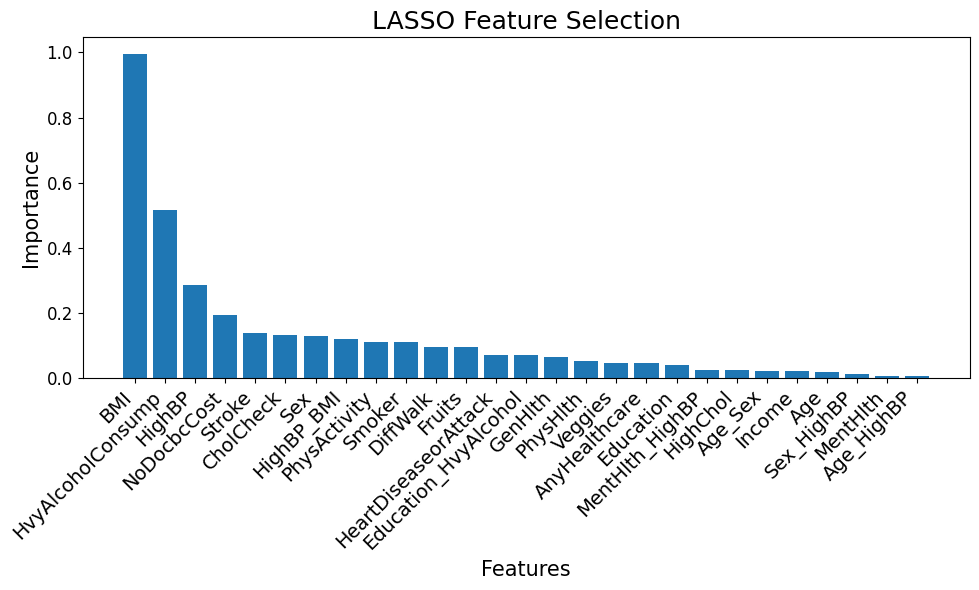

In [ ]:
# Set lasso parameter with best alpha
lasso_model = linear_model.Lasso(alpha=alpha, random_state=42)

# Fit the model on X train scaled resampled and Y train resampled data
lasso_model_fitted = lasso_model.fit(scaled_X_train_resampled, y_train_resampled)

# Extract coefficients from model
lasso_coef = lasso_model_fitted.coef_

# Using np.abs() to make coefficients positive - captures the magnitude of relationship while making it easy to filter later
lasso_coef = np.abs(lasso_coef)
lasso_coef

# extract column names to use in bar chart
names=scaled_X_train_resampled.columns

# Create a DataFrame with feature names and their absolute lasso coefficients
coef_df = pd.DataFrame({
    "Feature": names,
    "Importance": lasso_coef
})

# Sort the DataFrame in descending order by the 'Importance' column
coef_df = coef_df.sort_values(by="Importance", ascending=False)

# Plot the sorted bar chart
plt.figure(figsize=(10,6))
plt.bar(coef_df["Feature"], coef_df["Importance"])
plt.xticks(rotation=45, fontsize=14, ha='right')  # Rotate x-axis labels 45 degrees
plt.yticks(fontsize=12)
plt.title("LASSO Feature Selection", fontsize=18)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Importance", fontsize=15)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Logistic Regression, QDA, LDA, KNN, Naive Bayes

### Training

In [ ]:
### MODELS LOOP - LOGISTIC REGRESSION, QDA, LDA, KNN, NAIVE BAYES - FIT AND TRAIN

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Define models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LDA": LDA(),
    "QDA": QDA(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and store models
gina_fitted_models = {}

# Create loop to fit models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(scaled_X_train_resampled, y_train_resampled)
    gina_fitted_models[name] = model


Training Logistic Regression...

Training LDA...

Training QDA...

Training Naive Bayes...

Training KNN...


In [ ]:
gina_fitted_models

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'LDA': LinearDiscriminantAnalysis(),
 'QDA': QuadraticDiscriminantAnalysis(),
 'Naive Bayes': GaussianNB(),
 'KNN': KNeighborsClassifier()}

In [ ]:
gina_fitted_models['LDA'].coef_

array([[ 1.77524546,  0.14146565,  0.80662309,  6.08996906, -0.66545714,
        -0.83137806, -0.43632918, -0.67264545, -0.57837216, -0.28313604,
        -3.15171948, -0.28151132, -1.17420536,  0.38725953,  0.0405425 ,
         0.32793546, -0.58098857, -0.78304168,  0.11577673, -0.23898536,
        -0.12789107, -0.03682259,  0.13980285, -0.16134846, -0.08387952,
        -0.81874232,  0.43803325]])

### Validation Results


 Model Performance Summary - Validation Data

Logistic Regression:
  Validation AUC: 0.7703
Confusion Matrix:
[[27346 16321]
 [ 1508  5561]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.63      0.75     43667
           1       0.25      0.79      0.38      7069

    accuracy                           0.65     50736
   macro avg       0.60      0.71      0.57     50736
weighted avg       0.85      0.65      0.70     50736

Positive Recall Score:
0.7866742113453105
Weighted F1 Score:
0.7026039360863001
Precision Score:
0.25413581939493646
Accuracy Score:
0.6485927152317881


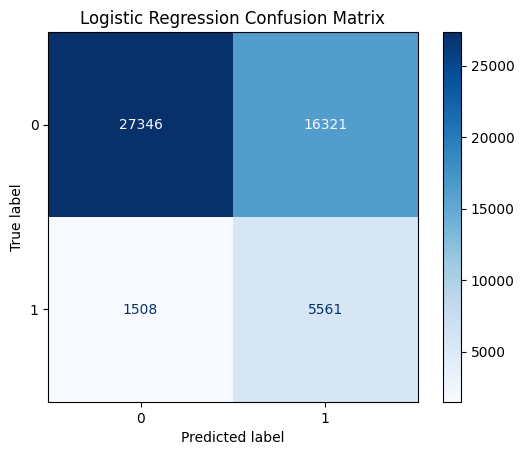


LDA:
  Validation AUC: 0.7700
Confusion Matrix:
[[27268 16399]
 [ 1496  5573]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     43667
           1       0.25      0.79      0.38      7069

    accuracy                           0.65     50736
   macro avg       0.60      0.71      0.57     50736
weighted avg       0.85      0.65      0.70     50736

Positive Recall Score:
0.7883717640401754
Weighted F1 Score:
0.7015060303530913
Precision Score:
0.2536409976333515
Accuracy Score:
0.6472918637653737


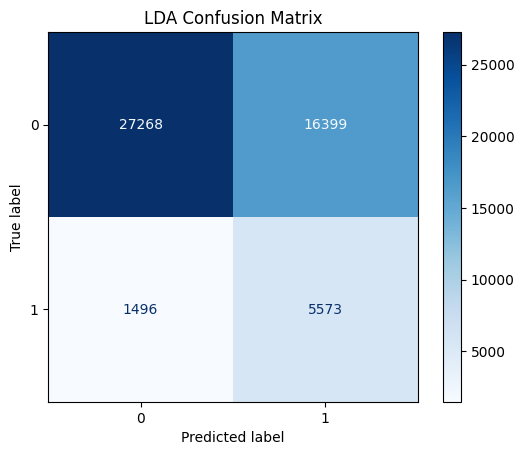


QDA:
  Validation AUC: 0.7537
Confusion Matrix:
[[28675 14992]
 [ 1909  5160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77     43667
           1       0.26      0.73      0.38      7069

    accuracy                           0.67     50736
   macro avg       0.60      0.69      0.58     50736
weighted avg       0.84      0.67      0.72     50736

Positive Recall Score:
0.7299476587919084
Weighted F1 Score:
0.7175874632322439
Precision Score:
0.25605398967844384
Accuracy Score:
0.6668834752444024


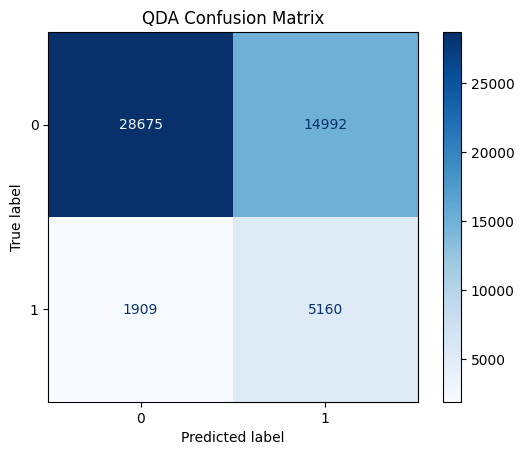


Naive Bayes:
  Validation AUC: 0.7705
Confusion Matrix:
[[28659 15008]
 [ 1662  5407]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.77     43667
           1       0.26      0.76      0.39      7069

    accuracy                           0.67     50736
   macro avg       0.61      0.71      0.58     50736
weighted avg       0.85      0.67      0.72     50736

Positive Recall Score:
0.764888951761211
Weighted F1 Score:
0.7215770617976512
Precision Score:
0.26485427381827087
Accuracy Score:
0.6714364553768527


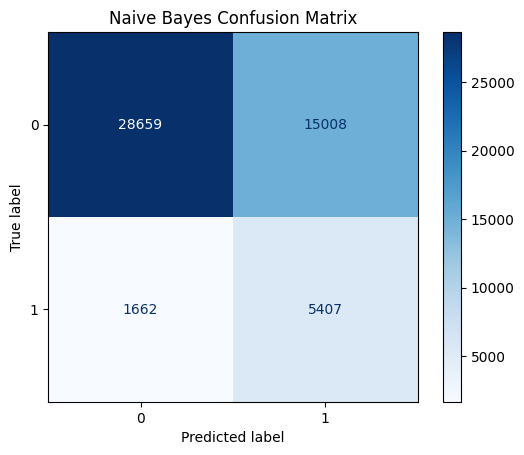


KNN:
  Validation AUC: 0.7113
Confusion Matrix:
[[31700 11967]
 [ 2996  4073]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     43667
           1       0.25      0.58      0.35      7069

    accuracy                           0.71     50736
   macro avg       0.58      0.65      0.58     50736
weighted avg       0.82      0.71      0.75     50736

Positive Recall Score:
0.5761776771820625
Weighted F1 Score:
0.7454443339665999
Precision Score:
0.253927680798005
Accuracy Score:
0.7050812046672974


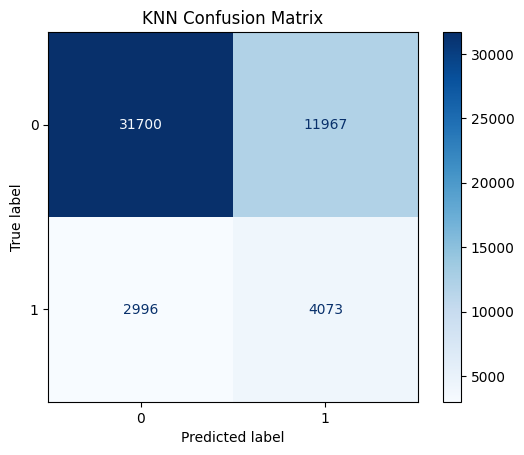

In [ ]:
### MODELS LOOP - LOGISTIC REGRESSION, QDA, LDA, KNN, NAIVE BAYES - VALIDATION

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report


print("\n Model Performance Summary - Validation Data")

# Dictionary to store AUC scores
auc_scores = {}

# For loop for predictions, ROCs, AUCs
for name, model in gina_fitted_models.items():
    # Get predicted probabilities
    y_val_prob = model.predict_proba(scaled_X_val)[:, 1]

    # Compute ROC curve & AUC
    fpr_val, tpr_val, thresholds = roc_curve(y_val, y_val_prob)

    auc_val = auc(fpr_val, tpr_val)
    auc_scores[name] = {"Validation AUC": auc_val}

    # Print AUC Scores
    print(f"\n{name}:")
    print(f"  Validation AUC: {auc_val:.4f}")

    # Find and apply optimal threshold
    optimal_idx = np.argmax(tpr_val - fpr_val)
    if optimal_idx > 0:
      optimal_threshold = thresholds[optimal_idx - 1]
    else:
      optimal_threshold = thresholds[0]
    y_pred_val = (y_val_prob >= optimal_threshold).astype(int)

    # Print Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred_val))

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_val, y_pred_val))

    # Print Positive Recall Score
    print("Positive Recall Score:")
    print(recall_score(y_val, y_pred_val))

    # Print F1 Score
    print("Weighted F1 Score:")
    print(f1_score(y_val, y_pred_val, average='weighted'))

    # Print Precision Score
    print("Precision Score:")
    print(precision_score(y_val, y_pred_val))

    # Print Accuracy Score
    print("Accuracy Score:")
    print(accuracy_score(y_val, y_pred_val))

    # Visualize Confusion Matrix
    cm = confusion_matrix(y_val, y_pred_val)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot(cmap='Blues', values_format='d')
    cm_display.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()

### Testing Results

\Model Performance Summary Test Data

Logistic Regression:
  Test AUC:  0.7714
Confusion Matrix:
[[36012  7655]
 [ 3460  3609]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.87     43667
           1       0.32      0.51      0.39      7069

    accuracy                           0.78     50736
   macro avg       0.62      0.67      0.63     50736
weighted avg       0.83      0.78      0.80     50736

Positive Recall Score:
0.5105389729806196
Weighted F1 Score:
0.8004624266990498
Precision Score:
0.253927680798005
Accuracy Score:
0.7050812046672974


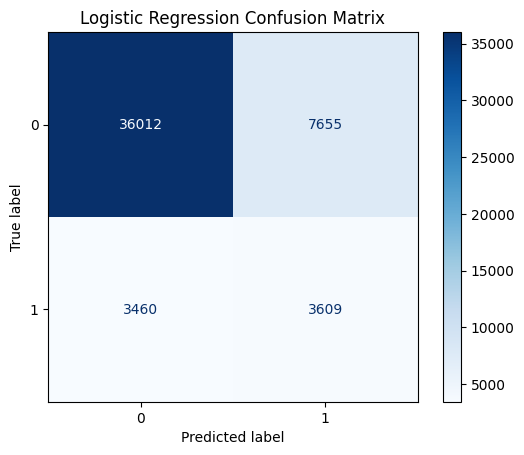


LDA:
  Test AUC:  0.7713
Confusion Matrix:
[[35596  8071]
 [ 3353  3716]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     43667
           1       0.32      0.53      0.39      7069

    accuracy                           0.77     50736
   macro avg       0.61      0.67      0.63     50736
weighted avg       0.83      0.77      0.80     50736

Positive Recall Score:
0.5256754845098317
Weighted F1 Score:
0.796574684662511
Precision Score:
0.253927680798005
Accuracy Score:
0.7050812046672974


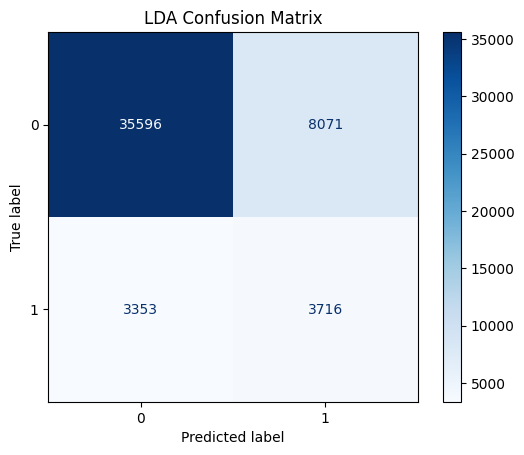


QDA:
  Test AUC:  0.7562
Confusion Matrix:
[[28922 14745]
 [ 1996  5073]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     43667
           1       0.26      0.72      0.38      7069

    accuracy                           0.67     50736
   macro avg       0.60      0.69      0.58     50736
weighted avg       0.84      0.67      0.72     50736

Positive Recall Score:
0.7176404017541378
Weighted F1 Score:
0.7200655710885974
Precision Score:
0.253927680798005
Accuracy Score:
0.7050812046672974


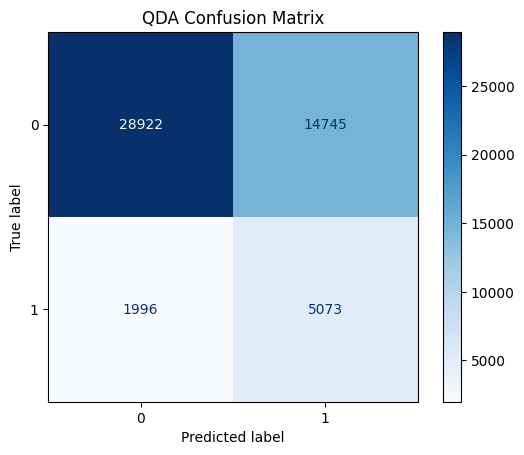


Naive Bayes:
  Test AUC:  0.7708
Confusion Matrix:
[[29798 13869]
 [ 1857  5212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     43667
           1       0.27      0.74      0.40      7069

    accuracy                           0.69     50736
   macro avg       0.61      0.71      0.59     50736
weighted avg       0.85      0.69      0.74     50736

Positive Recall Score:
0.7373037204696562
Weighted F1 Score:
0.7365167506830672
Precision Score:
0.253927680798005
Accuracy Score:
0.7050812046672974


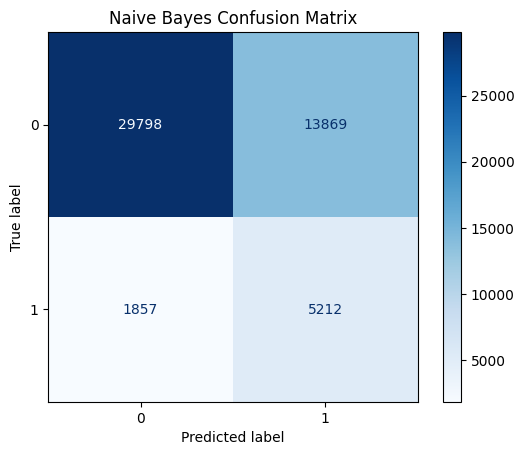


KNN:
  Test AUC:  0.7093
Confusion Matrix:
[[31700 11967]
 [ 2968  4101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     43667
           1       0.26      0.58      0.35      7069

    accuracy                           0.71     50736
   macro avg       0.58      0.65      0.58     50736
weighted avg       0.82      0.71      0.75     50736

Positive Recall Score:
0.5801386334700807
Weighted F1 Score:
0.7459710201690349
Precision Score:
0.253927680798005
Accuracy Score:
0.7050812046672974


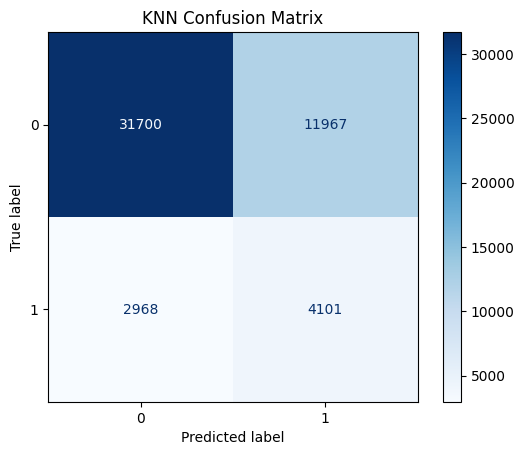

In [ ]:
### MODELS LOOP - LOGISTIC REGRESSION, QDA, LDA, KNN, NAIVE BAYES - TESTING

print("\Model Performance Summary Test Data")

# Dictionary to store AUC scores
auc_scores = {}

for name, model in gina_fitted_models.items():
    # Get predicted probabilities
    y_test_prob = model.predict_proba(scaled_X_test)[:, 1]

    # Compute ROC curve & AUC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    auc_test = auc(fpr_test, tpr_test)
    auc_scores[name] = {"Test AUC": auc_test}

    # Print AUC Scores
    print(f"\n{name}:")
    print(f"  Test AUC:  {auc_test:.4f}")

    # Apply optimal threshold
    y_pred_test = (y_test_prob >= optimal_threshold).astype(int)

    # Print Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Print Positive Recall Score
    print("Positive Recall Score:")
    print(recall_score(y_test, y_pred_test))

    # Print F1 Score
    print("Weighted F1 Score:")
    print(f1_score(y_test, y_pred_test, average='weighted'))

    # Print Precision Score
    print("Precision Score:")
    print(precision_score(y_val, y_pred_val))

    # Print Accuracy Score
    print("Accuracy Score:")
    print(accuracy_score(y_val, y_pred_val))

    # Visualize Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot(cmap='Blues', values_format='d')
    cm_display.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()

### ROC Curves - Some Models

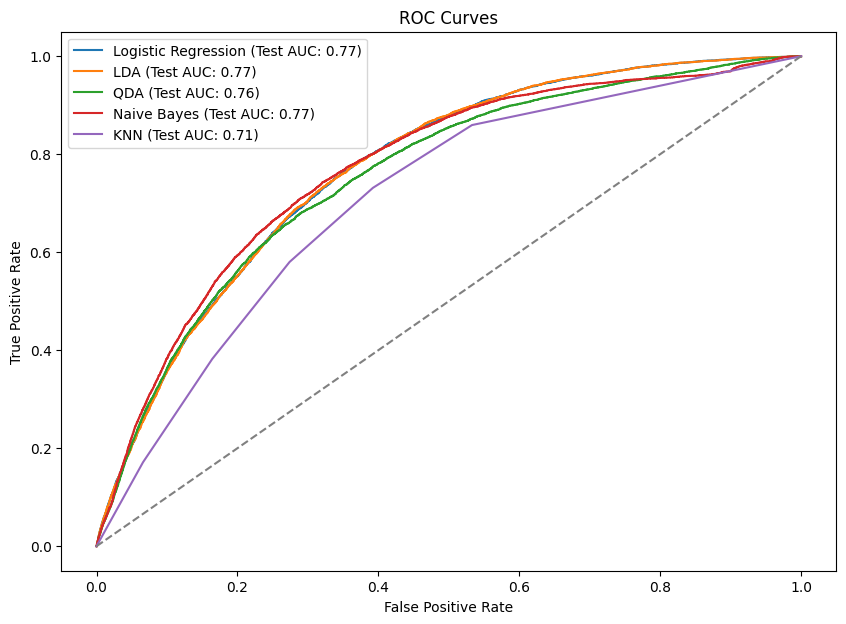

In [ ]:
# ROC curve with some models
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for name, model in gina_fitted_models.items():
    y_test_prob = model.predict_proba(scaled_X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (Test AUC: {auc_score:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


## SVM Model

In [ ]:
from sklearn import svm
import sklearn.model_selection as skm
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

#svm_poly = svm.SVC(C=1, kernel='poly', verbose=True, max_iter=100000)  # Enables progress output
#svm_poly.fit(scaled_X_train_resampled, y_train_resampled)

In [ ]:
#y_val_pred = svm_poly.predict(scaled_X_val)


In [ ]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
# F1
#f1 = f1_score(y_val, y_val_pred, average='weighted')
#print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
#print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
#print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

In [ ]:
# Get the confusion matrix for Naive Bayes
#cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
#cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
#cm_display.plot(cmap='Blues', values_format='d')
#cm_display.ax_.set_title(f"Confusion Matrix for SVM")
#plt.show()

In [ ]:
#svm_gs = svm.SVC(random_state=42, verbose = True, max_iteration = 1000)

# Define the parameter grid to search over
#param_grid_svm = {
#    'kernel': ['linear','poly'],  # Different depths to try
#    'C': [0.1, 1, 10],  # Different splitting criteria
#}

# Set up the grid search
#grid_search_svm = GridSearchCV(estimator=svm_gs,
#                           param_grid=param_grid_svm,
#                           cv=3,
#                           scoring='recall',  # You can change the metric to optimize for
#                           verbose=1)

# Fit the model
#grid_search_svm.fit(scaled_X_train_resampled, y_train_resampled)

# Output the best parameters and score
#print(f"Best Parameters: {grid_search_svm.best_params_}")
#print(f"Best Score: {grid_search_svm.best_score_:.4f}")

## Decision Tree

In [ ]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)

In [ ]:
base_decision_tree_model = DTC(
    criterion='entropy',  # Splitting criterion
    max_depth=10,  # Limits depth to prevent overfitting
    random_state=0  # Ensures reproducibility
)
base_decision_tree_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
y_val_pred_dt = base_decision_tree_model.predict(X_val)

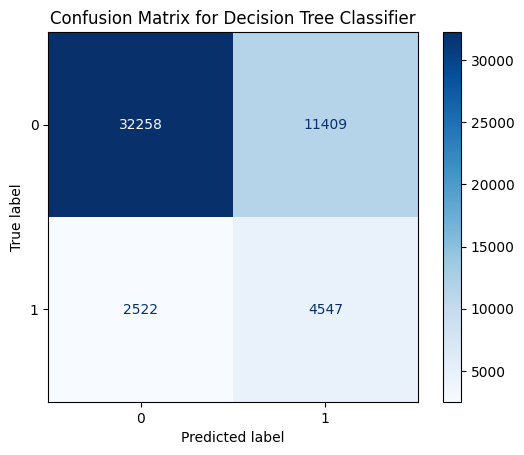

In [ ]:
# Get the confusion matrix for Naive Bayes
cm_dt = confusion_matrix(y_val, y_val_pred_dt)

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
cm_display.plot(cmap='Blues', values_format='d')
cm_display.ax_.set_title(f"Confusion Matrix for Decision Tree Classifier")
plt.show()

In [ ]:
f1 = f1_score(y_val, y_val_pred_dt, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

Validation F1 Score: 0.7629


In [ ]:
gs_decision_tree_model = DTC(random_state=0)

# Define the parameter grid to search over
param_grid_dt = {
    'max_depth': [3, 5, 10, 15],  # Different depths to try
    'criterion': ['gini', 'entropy'],  # Different splitting criteria
}

# Set up the grid search
grid_search_dt = GridSearchCV(estimator=gs_decision_tree_model,
                           param_grid=param_grid_dt,
                           cv=3,  # 5-fold cross-validation
                           scoring='recall',  # You can change the metric to optimize for
                           verbose=1)

# Fit the model
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and score
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Best Score: {grid_search_dt.best_score_:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15}
Best Score: 0.8229


In [ ]:
final_decision_tree_model = DTC(
    criterion='gini',  # Splitting criterion
    max_depth=15,  # Limits depth to prevent overfitting
    random_state=0  # Ensures reproducibility
)
final_decision_tree_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [ ]:
y_val_pred_dtfin = final_decision_tree_model.predict(X_val)

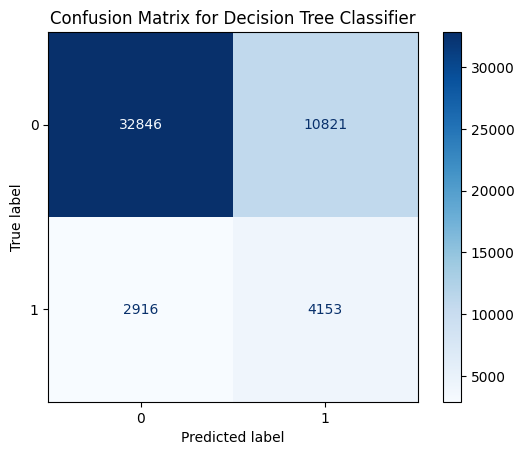

In [ ]:
# Get the confusion matrix for Naive Bayes
cm_dtfin = confusion_matrix(y_val, y_val_pred_dtfin)

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dtfin)
cm_display.plot(cmap='Blues', values_format='d')
cm_display.ax_.set_title(f"Confusion Matrix for Decision Tree Classifier")
plt.show()

In [ ]:
# F1
f1 = f1_score(y_val, y_val_pred_dtfin, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_val_pred_dtfin))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dtfin))

Validation F1 Score: 0.7643
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83     43667
           1       0.28      0.59      0.38      7069

    accuracy                           0.73     50736
   macro avg       0.60      0.67      0.60     50736
weighted avg       0.83      0.73      0.76     50736

Confusion Matrix:
 [[32846 10821]
 [ 2916  4153]]


## Bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Initialize base Decision Tree
bag_dt = DecisionTreeClassifier(max_depth=15)

# Create BaggingClassifier with the Decision Tree as base estimator
bagged_dt = BaggingClassifier(
    estimator=bag_dt,  # Decision Tree as the base estimator
    n_estimators=5,         # Number of trees in the ensemble
    max_samples=0.5,        # Each tree is trained on 50% of the data
    bootstrap=True,         # Bootstrap sampling (sampling with replacement)
    random_state=42
)

In [ ]:
bagged_dt.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=15),
                  max_samples=0.5, n_estimators=5, random_state=42)

In [ ]:
y_pred_val_bagdt = bagged_dt.predict(X_val)

In [ ]:
# F1
f1 = f1_score(y_val, y_pred_val_bagdt, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred_val_bagdt))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_bagdt))

Validation F1 Score: 0.7793
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84     43667
           1       0.29      0.57      0.39      7069

    accuracy                           0.75     50736
   macro avg       0.61      0.67      0.62     50736
weighted avg       0.83      0.75      0.78     50736

Confusion Matrix:
 [[34033  9634]
 [ 3059  4010]]


In [ ]:
#1. create a dt for the bagging method

bag_dt_gs = DTC(max_depth = 15)

#2. Initialize the bagging model

bag_dt_gs_model = BaggingClassifier(
                        estimator = bag_dt_gs,
                        random_state = 42)

bag_param_grid = {
    'n_estimators': [10, 20, 30],         # Number of trees in the ensemble
    'max_samples': [0.5, 0.6, 0.7],
    'max_features': [0.5, 0.6, 0.7],    # Proportion of features to use for each tree
    'bootstrap': [True, False]}


grid_search_bag = GridSearchCV(
    estimator=bag_dt_gs_model,
    param_grid=bag_param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='recall',  # You can change this to 'f1', 'precision', 'recall', etc.
    verbose=1)

# Fit the model to the training data (replace X_train and y_train with your data)
grid_search_bag.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and score
print(f"Best Parameters: {grid_search_bag.best_params_}")
print(f"Best Score: {grid_search_bag.best_score_:.4f}")



Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'bootstrap': False, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 20}
Best Score: 0.8579


In [ ]:
# Initialize base Decision Tree
bag_dt_final = DecisionTreeClassifier(max_depth=15)

# Create BaggingClassifier with the Decision Tree as base estimator
bagged_dt_final = BaggingClassifier(
    estimator=bag_dt_final,  # Decision Tree as the base estimator
    n_estimators=20,         # Number of trees in the ensemble
    max_samples=0.7,
    max_features = 0.7,
    bootstrap=False,         # Bootstrap sampling (sampling with replacement)
    random_state=42
)

In [ ]:
# Train the model
bagged_dt_final.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_val_bagdt_final = bagged_dt_final.predict(X_val)

# F1
f1 = f1_score(y_val, y_pred_val_bagdt_final, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred_val_bagdt_final))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_bagdt_final))

Validation F1 Score: 0.8013
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86     43667
           1       0.33      0.58      0.42      7069

    accuracy                           0.78     50736
   macro avg       0.63      0.70      0.64     50736
weighted avg       0.84      0.78      0.80     50736

Confusion Matrix:
 [[35374  8293]
 [ 2963  4106]]


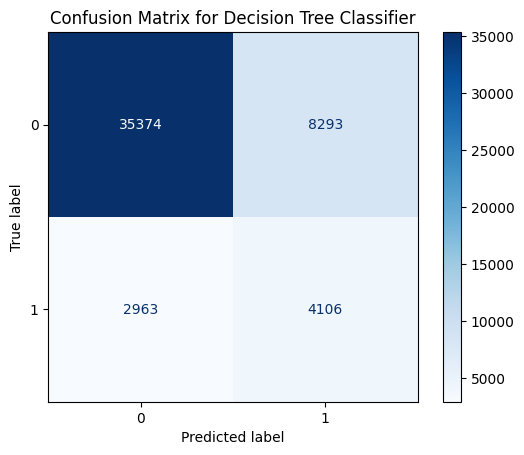

In [ ]:
# Get the confusion matrix for Naive Bayes
cm_dt_bagfin = confusion_matrix(y_val, y_pred_val_bagdt_final)

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt_bagfin)
cm_display.plot(cmap='Blues', values_format='d')
cm_display.ax_.set_title(f"Confusion Matrix for Decision Tree Classifier")
plt.show()

## Boosting

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=15, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with the custom Decision Tree as the base estimator
boosting_model = AdaBoostClassifier(
    estimator=dt_classifier,  # Use the custom Decision Tree
    n_estimators=20,  # Number of boosting iterations (trees)
    learning_rate=1.0,  # Contribution of each tree
    random_state=42
)

# Fit the AdaBoost model
boosting_model.fit(X_train_resampled, y_train_resampled)

y_pred_val_boostdt = boosting_model.predict(X_val)


# F1
f1 = f1_score(y_val, y_pred_val_boostdt, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred_val_boostdt))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_boostdt))

Validation F1 Score: 0.8059
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     43667
           1       0.32      0.39      0.35      7069

    accuracy                           0.80     50736
   macro avg       0.61      0.63      0.61     50736
weighted avg       0.82      0.80      0.81     50736

Confusion Matrix:
 [[37727  5940]
 [ 4334  2735]]


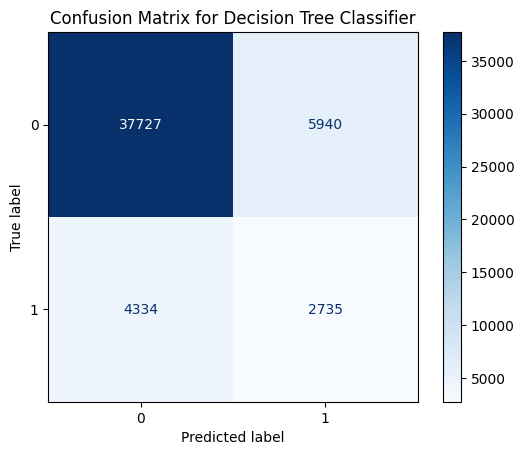

In [ ]:
# Get the confusion matrix for Naive Bayes
cm_dt_boostfin = confusion_matrix(y_val, y_pred_val_boostdt)

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt_boostfin)
cm_display.plot(cmap='Blues', values_format='d')
cm_display.ax_.set_title(f"Confusion Matrix for Decision Tree Classifier")
plt.show()

In [ ]:
#1. create a dt for the boost method

boost_dt_gs = DTC(max_depth = 15)

#2. Initialize the boosting model

boost_dt_gs_model = AdaBoostClassifier(
                        estimator = boost_dt_gs,
                        random_state = 42)

# Define the parameter grid for grid search
param_grid_boost = {
    'n_estimators': [20, 50, 100],   # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2]  # How much each tree contributes
        # Max depth of the individual decision tree
}

# Set up the grid search with cross-validation
grid_search_boost = GridSearchCV(
    estimator=boost_dt_gs_model,
    param_grid=param_grid_boost,
    cv=3,                          # 3-fold cross-validation
    scoring='recall',            # Use accuracy, or change to another metric like 'f1', 'recall', etc.
    verbose=1                   # Output the progress
)

# Fit the model to the training data (replace X_train and y_train with your data)
grid_search_boost.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and score
print(f"Best Parameters: {grid_search_boost.best_params_}")
print(f"Best Score: {grid_search_boost.best_score_:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.8604


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=15, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with the custom Decision Tree as the base estimator
boosting_model_fin = AdaBoostClassifier(
    estimator=dt_classifier,  # Use the custom Decision Tree
    n_estimators=50,  # Number of boosting iterations (trees)
    learning_rate=0.1,  # Contribution of each tree
    random_state=42
)

# Fit the AdaBoost model
boosting_model_fin.fit(X_train_resampled, y_train_resampled)

y_pred_val_boostdt_fin = boosting_model_fin.predict(X_val)


# F1
f1 = f1_score(y_val, y_pred_val_boostdt_fin, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred_val_boostdt_fin))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_boostdt_fin))

Validation F1 Score: 0.7973
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86     43667
           1       0.32      0.54      0.40      7069

    accuracy                           0.77     50736
   macro avg       0.62      0.68      0.63     50736
weighted avg       0.83      0.77      0.80     50736

Confusion Matrix:
 [[35479  8188]
 [ 3237  3832]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=20,   # Number of trees in the forest
    max_depth=15,      # Maximum depth of the trees
    random_state=42     # For reproducibility
)

# Fit the model to the training data
rf_model.fit(X_train_resampled, y_train_resampled)

y_val_pred_rf = rf_model.predict(X_val)

# F1
f1 = f1_score(y_val, y_val_pred_rf, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))


Validation F1 Score: 0.7873
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85     43667
           1       0.31      0.61      0.41      7069

    accuracy                           0.76     50736
   macro avg       0.62      0.70      0.63     50736
weighted avg       0.84      0.76      0.79     50736

Confusion Matrix:
 [[34156  9511]
 [ 2747  4322]]


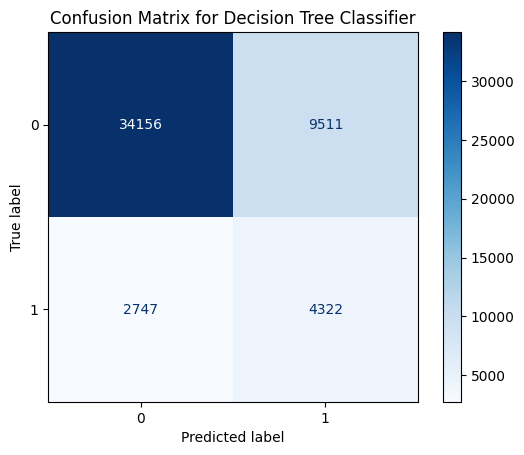

In [ ]:
# Get the confusion matrix for Naive Bayes
cm_rf = confusion_matrix(y_val, y_val_pred_rf)

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
cm_display.plot(cmap='Blues', values_format='d')
cm_display.ax_.set_title(f"Confusion Matrix for Decision Tree Classifier")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8667


In [ ]:
# Initialize RandomForestClassifier
rf_model_final = RandomForestClassifier(
    n_estimators=200,   # Number of trees in the forest
    max_depth=10,
    min_samples_leaf = 2,
    min_samples_split = 2 ,# Maximum depth of the trees
    random_state=42     # For reproducibility
)

# Fit the model to the training data
rf_model_final.fit(X_train_resampled, y_train_resampled)

y_val_pred_rf_final = rf_model_final.predict(X_val)

# F1
f1 = f1_score(y_val, y_val_pred_rf_final, average='weighted')
print(f"Validation F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf_final))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf_final))

Validation F1 Score: 0.7733
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83     43667
           1       0.30      0.69      0.42      7069

    accuracy                           0.74     50736
   macro avg       0.62      0.72      0.63     50736
weighted avg       0.85      0.74      0.77     50736

Confusion Matrix:
 [[32565 11102]
 [ 2214  4855]]


# Testing

## Decision Tree

In [ ]:
y_pred_final = final_decision_tree_model.predict(X_test)

F1 Score: 0.3746808224700981
[[32595 11072]
 [ 2887  4182]]


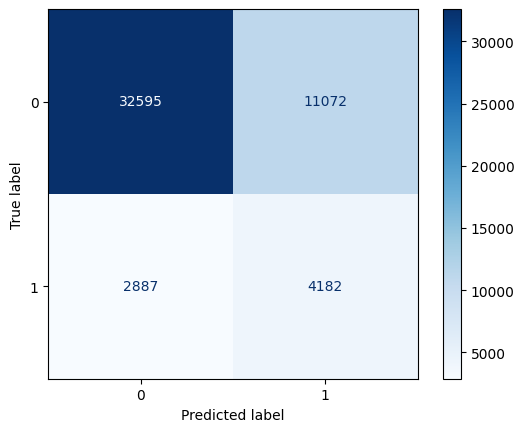

0.2741575980070801
0.5915971141604187
0.3746808224700981
0.7248699148533586


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

f1 = f1_score(y_test, y_pred_final)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred_final)

# Option 1: Print the confusion matrix as an array
print(cm)

# Option 2: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
accuracy = accuracy_score(y_test, y_pred_final)

print(precision)
print(recall)
print(f1)
print(accuracy)

## Bagging Test

F1 Score: 0.42075977540593856
[[35126  8541]
 [ 2910  4159]]


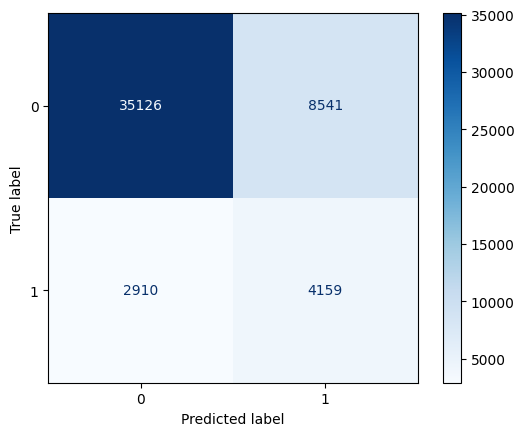

0.3274803149606299
0.588343471495261
0.42075977540593856
0.774302270577105


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report


y_pred_final_bag = bagged_dt_final.predict(X_test)


f1 = f1_score(y_test, y_pred_final_bag)
print("F1 Score:", f1)

cm_bag = confusion_matrix(y_test, y_pred_final_bag)

# Option 1: Print the confusion matrix as an array
print(cm_bag)

# Option 2: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bag)
disp.plot(cmap=plt.cm.Blues)
plt.show()

precision = precision_score(y_test, y_pred_final_bag)
recall = recall_score(y_test, y_pred_final_bag)
f1 = f1_score(y_test, y_pred_final_bag)
accuracy = accuracy_score(y_test, y_pred_final_bag)

print(precision)
print(recall)
print(f1)
print(accuracy)

## Boosting Test

F1 Score: 0.39894606323620585
[[35241  8426]
 [ 3208  3861]]


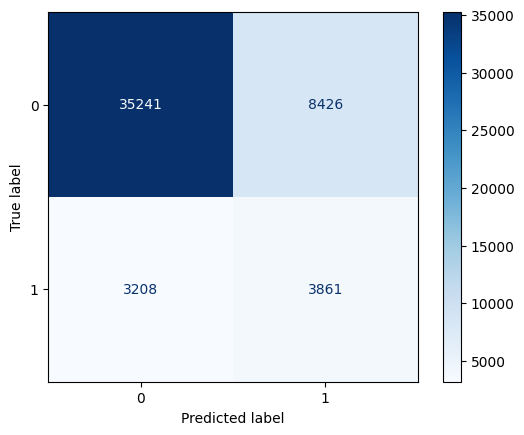

0.3142345568487019
0.5461875795727825
0.39894606323620585
0.7706953642384106


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report


y_pred_final_boost = boosting_model_fin.predict(X_test)


f1 = f1_score(y_test, y_pred_final_boost)
print("F1 Score:", f1)

cm_boost = confusion_matrix(y_test, y_pred_final_boost)

# Option 1: Print the confusion matrix as an array
print(cm_boost)

# Option 2: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_boost)
disp.plot(cmap=plt.cm.Blues)
plt.show()

precision = precision_score(y_test, y_pred_final_boost)
recall = recall_score(y_test, y_pred_final_boost)
f1 = f1_score(y_test, y_pred_final_boost)
accuracy = accuracy_score(y_test, y_pred_final_boost)

print(precision)
print(recall)
print(f1)
print(accuracy)

## Random Forest

F1 Score: 0.42163793103448277
[[32427 11240]
 [ 2178  4891]]


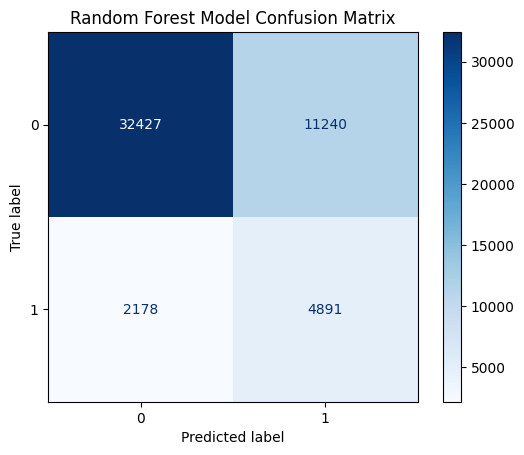

precision: 0.30320500898890335
recall: 0.6918941858820201
f1: 0.42163793103448277
accuracy: 0.7355329549038159


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

y_pred_final_rf = rf_model_final.predict(X_test)

f1 = f1_score(y_test, y_pred_final_rf)
print("F1 Score:", f1)

cm_rf = confusion_matrix(y_test, y_pred_final_rf)

# Option 1: Print the confusion matrix as an array
print(cm_rf)

# Option 2: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Model Confusion Matrix")  # Add title here
plt.show()

precision = precision_score(y_test, y_pred_final_rf)
recall = recall_score(y_test, y_pred_final_rf)
f1 = f1_score(y_test, y_pred_final_rf)
accuracy = accuracy_score(y_test, y_pred_final_rf)

print("precision:", precision)
print("recall:", recall)
print("f1:", f1)
print("accuracy:", accuracy)

### Random Forest Variable Values

In [ ]:
importances = rf_model_final.feature_importances_

# Convert to a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

                 Feature  Importance
25            HighBP_BMI    0.144397
21            Age_HighBP    0.141847
3                    BMI    0.106103
0                 HighBP    0.104073
13               GenHlth    0.089561
7           PhysActivity    0.082777
20                Income    0.060881
18                   Age    0.049931
19             Education    0.047692
8                 Fruits    0.031746
22               Age_Sex    0.022196
4                 Smoker    0.020214
15              PhysHlth    0.016479
12           NoDocbcCost    0.016319
9                Veggies    0.012116
10     HvyAlcoholConsump    0.009669
24            Sex_HighBP    0.009037
23       MentHlth_HighBP    0.006974
26  Education_HvyAlcohol    0.006100
14              MentHlth    0.005822
17                   Sex    0.003702
1               HighChol    0.003309
2              CholCheck    0.002721
5                 Stroke    0.002130
16              DiffWalk    0.001997
6   HeartDiseaseorAttack    0.001269
1

## Naive Bayes - Feature Contribution Priors

In [ ]:
# Get the class probabilities (prior probabilities)
class_probs = gina_fitted_models['Naive Bayes'].class_prior_

# Display the contributions for each feature for each class
feature_contributions = {}

# Get means
means = gina_fitted_models['Naive Bayes'].theta_

# Loop over each class' mean values for each feature
for i, mean in enumerate(means):
    for j, value in enumerate(mean):
        feature_contributions[(i, j)] = class_probs[i]

# To print:
for key, prior in feature_contributions.items():
    print(f"Class {key[0]} - Feature {key[1]}: Prior = {prior}")

feature_names = scaled_X_test.columns
class_names = {0: "No Diabetes", 1: "Diabetes"}
class_names

# Convert the dictionary to a DataFrame:
df_contrib = pd.DataFrame(list(feature_contributions.items()),
                          columns=['Class_Feature', 'Contribution'])

# Split the tuple into separate columns:
df_contrib['Class'] = df_contrib['Class_Feature'].apply(lambda x: x[0])
df_contrib['Feature_Index'] = df_contrib['Class_Feature'].apply(lambda x: x[1])

# Map feature indices to feature names:
df_contrib['Feature'] = df_contrib['Feature_Index'].apply(lambda i: feature_names[i])

# Map class numbers to names:
df_contrib['Class_Name'] = df_contrib['Class'].apply(lambda c: class_names.get(c, c))

# Create a combined label for plotting:
df_contrib['Label'] = df_contrib.apply(lambda row: f"{row['Class_Name']} - {row['Feature']}", axis=1)

# Sort the DataFrame by contribution if desired (here they're all the same, so it may not change order)
df_contrib = df_contrib.sort_values(by='Contribution', ascending=False)

# Now, plot a bar chart:
plt.figure(figsize=(12, 6))
plt.bar(df_contrib['Label'], df_contrib['Contribution'])
plt.xlabel("Class and Feature")
plt.ylabel("Contribution (Prior)")
plt.title("Feature Contributions by Class (Using Class Priors)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Naive Bayes - Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Compute mutual information between each feature and the target
mi_scores = mutual_info_classif(scaled_X_test, y_test, random_state=42)

# Create a DataFrame for better readability
mi_df = pd.DataFrame({
    'Feature': scaled_X_test.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print(mi_df)

# Plot the mutual information scores
plt.figure(figsize=(12,6))
plt.bar(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Mutual Information Score", fontsize=14)
plt.title("Naive Bayes Feature Importance based on Mutual Information", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Naive Bayes - Likelihood Plot

In [ ]:
## Likelihood Plot
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Get the fitted Naive Bayes model from your dictionary
nb = gina_fitted_models['Naive Bayes']

# Choose a feature to plot (for example, the first feature)
feature_idx = 0
feature_name = scaled_X_test.columns[feature_idx]

# Create a range of values spanning the observed range for this feature in the test set
x_min = scaled_X_test.iloc[:, feature_idx].min()
x_max = scaled_X_test.iloc[:, feature_idx].max()
x_range = np.linspace(x_min, x_max, 100)

# For each class, get the mean and variance for the chosen feature from the Naive Bayes model
for i, class_label in enumerate(nb.classes_):
    mean_val = nb.theta_[i, feature_idx]  # Learned mean for the feature in class i
    var_val = nb.var_[i, feature_idx]     # Learned variance for the feature in class i
    # Compute the likelihood (PDF) using the normal distribution
    pdf = st.norm.pdf(x_range, mean_val, np.sqrt(var_val))
    plt.plot(x_range, pdf, label=f"Class {class_label}")

plt.xlabel(f"Value of {feature_name}", fontsize=14)
plt.ylabel("Likelihood (Probability Density)", fontsize=14)
plt.title(f"Likelihood Plot for {feature_name} using Naive Bayes", fontsize=16)
plt.legend(fontsize=12)
plt.show()

### All Feature Likelihood
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Assume nb is your fitted Naive Bayes model from gina_fitted_models
nb = gina_fitted_models['Naive Bayes']
feature_names = scaled_X_test.columns
n_features = len(feature_names)

# Determine subplot layout (e.g., 3 columns)
ncols = 3
nrows = math.ceil(n_features / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))
axes = axes.flatten()

for idx, feature_name in enumerate(feature_names):
    feature_idx = idx
    # Create a range for x using the test data range for this feature
    x_min = scaled_X_test.iloc[:, feature_idx].min()
    x_max = scaled_X_test.iloc[:, feature_idx].max()
    x_range = np.linspace(x_min, x_max, 100)

    # Plot the likelihood (PDF) for each class for this feature
    for i, class_label in enumerate(nb.classes_):
        mean_val = nb.theta_[i, feature_idx]
        var_val = nb.var_[i, feature_idx]
        pdf = st.norm.pdf(x_range, mean_val, np.sqrt(var_val))
        axes[idx].plot(x_range, pdf, label=f"Class {class_label}")

    axes[idx].set_title(feature_name, fontsize=12)
    axes[idx].set_xlabel(feature_name, fontsize=10)
    axes[idx].set_ylabel("Probability Density", fontsize=10)
    axes[idx].legend(fontsize=8)

# If there are any unused subplots, turn them off
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# ROC Curves - All Models

In [ ]:
# Create dictionary with all fitted models
all_fitted_models = {}
all_fitted_models.update(gina_fitted_models)
all_fitted_models.update({
    'Decision Tree': final_decision_tree_model.fit(scaled_X_train_resampled, y_train_resampled),
    'Bagging': bagged_dt_final.fit(scaled_X_train_resampled, y_train_resampled),
    'Boosting': boosting_model_fin.fit(scaled_X_train_resampled, y_train_resampled),
    'Random Forest': rf_model_final.fit(scaled_X_train_resampled, y_train_resampled),
    'SVM': svm_poly.fit(scaled_X_train_resampled, y_train_resampled)
})


In [ ]:
# Extract probabilities from each model using test data
probas_test = {}
for name, model in all_fitted_models.items():
    probas_test[name] = model.predict_proba(scaled_X_test)[:, 1]


In [ ]:
# Create a list to hold tuples of (model_name, auc_score, fpr, tpr)
auc_data = []

for name, probs in probas_test.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    auc_data.append((name, auc_score, fpr, tpr))

# Sort the list in descending order by auc_score
auc_data.sort(key=lambda x: x[1], reverse=True)

# Plot the ROC curves in descending order of AUC
plt.figure(figsize=(10, 7))
for name, auc_score, fpr, tpr in auc_data:
    plt.plot(fpr, tpr, label=f"{name} (Test AUC: {auc_score:.4f})")

# Plot the reference line for random classifier
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for the positive class
y_test_scores_rf = rf_model_final.predict_proba(X_test)[:, 1]

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_scores_rf)

# Compute PR AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

Precision-Recall AUC: 0.3416


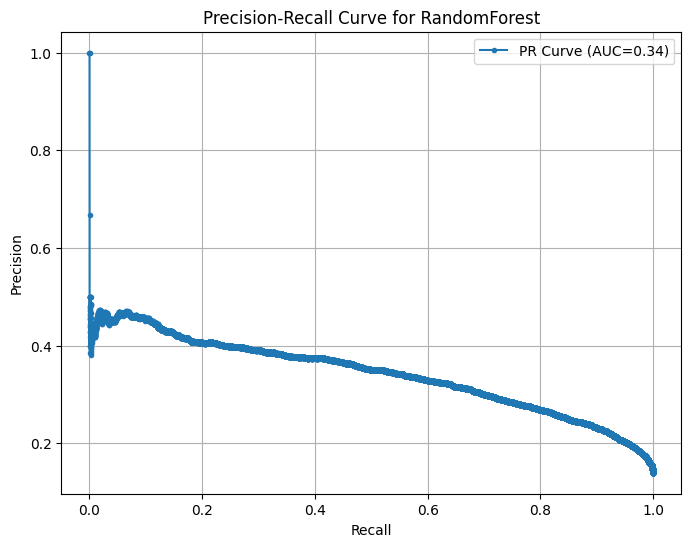

In [ ]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest')
plt.legend()
plt.grid()
plt.show()

In [ ]:
### NAIVE BAYES

# Get predicted probabilities for the positive class
y_test_scores_nb = gina_fitted_models['Naive Bayes'].predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_scores_nb)

# Compute PR AUC
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Naive Bayes Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()